# CS210 SPRING 2021-2022 TERM PROJECT

COVID-19 Global Report

Carried out by the Group 5 Members;

Buket YURT - 28263 (buketyurt@sabanciuniv.edu)

Kaan Coşkun ADALILAR - 28384 (kaanadalilar@sabanciuniv.edu)

Remzi Umut SÖNMEZ - 28178 (remzis@sabanciuniv.edu)

Burak YEREBAKAN - 27875 (burakyerebakan@sabanciuniv.edu)


Supervised by;

Muhammet Nurullah CEBECİ

Selim BALCISOY - Professor of the CS210 Course



## Introduction
Our main aim with this project is to analyze given data sets that contain COVID-19 general confirmed cases, deaths, recovered cases since the beginning of the pandemic. As you will proceed in this document, firstly you will see visualization of our data. This will help you to understand what our data includes. We divided our dataset into subgroups like WHO regions and countries and their corresponding features. After understanding the data, we tried to understand some trends and relationships. In the hypothesis testing part this claims and their tests can be found. After all, lastly, we tried to prepare predictive models with the machine learning algorithms. 


### Utilized Datasets
<font color="yellow">
The sources that we used as additional datasets can be reached by these links:

https://drive.google.com/file/d/1TE1NzA65VQX7Z6Nw5CnuOHHaMGyBr1JG/view?usp=sharing

https://drive.google.com/file/d/1eqOzycfaOf-8yPeA0XfmjgUytnnwNv6f/view?usp=sharing

</font>

Both of the datasets are downloaded from kaggle.com

Source links are respectively like following:

https://www.kaggle.com/datasets/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv

https://www.kaggle.com/datasets/imdevskp/corona-virus-report?select=country_wise_latest.csv

### Before Starting
***Importing useful Phyton libraries & including dataset files (connect Google Drive)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import datetime
import math
import array as arr

In [ ]:
drive.mount("./drive", force_remount=True)
path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis



### Main Dataset and Its Features

In this section, we will include useful libraries of Phyton and our datasets into the project notebook and reveal its basic properties such as number of features and their types, dataset shape and descriptive statistics.

In [ ]:
df = pd.read_csv('./drive/MyDrive/covid_19_clean_complete_2022.csv')
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df2 = pd.read_csv('./drive/MyDrive/country_wise_latest.csv') #new dataset for new features
df2.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
214889,NaN,West Bank and Gaza,31.952200,35.233200,2022-03-04,649971,5557,0,644414,Eastern Mediterranean
214890,NaN,Winter Olympics 2022,39.904200,116.407400,2022-03-04,530,0,0,530,NaN
214891,NaN,Yemen,15.552727,48.516388,2022-03-04,11774,2135,0,9639,Eastern Mediterranean
214892,NaN,Zambia,-13.133897,27.849332,2022-03-04,313613,3958,0,309655,Africa


In [ ]:
df2

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [ ]:
shape = df.shape
print('Our first dataset has',shape[0],'data points and',shape[1],'features')

shape2 = df2.shape
print('Our second dataset has',shape2[0],'data points and',shape2[1],'features')

Our first dataset has 214894 data points and 10 features
Our second dataset has 187 data points and 15 features


These 10 features of our first dataset have their respective data types. Let's see them!

In [ ]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

Some data types are labeled as object. In fact, they are either categorical data or date objects judging by their name. 

Let's see their unique values to confirm this deduction.

In [ ]:
for col in df.columns:
  if df.dtypes[col] == np.object:
    print('Column',col,'has following example of unique values:')
    print(df[col].unique().tolist()[:5]) #this is only a sample 
    print('There are',len(df[col].unique()),'unique values\n')

Column Province/State has following example of unique values:
[nan, 'Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland']
There are 86 unique values

Column Country/Region has following example of unique values:
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']
There are 197 unique values

Column Date has following example of unique values:
['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']
There are 773 unique values

Column WHO Region has following example of unique values:
['Eastern Mediterranean', 'Europe', 'Africa', nan, 'Americas']
There are 7 unique values



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Now, let's check other columns. Since they are numerical values, we take a look at their statistics.

In [ ]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,213348.000000,213348.000000,2.148940e+05,214894.000000,2.148940e+05,2.148940e+05
mean,20.528131,22.735337,4.578132e+05,9310.764693,1.079987e+05,3.405037e+05
std,25.899139,76.304185,2.708770e+06,47497.835275,8.470111e+05,2.516382e+06
min,-71.949900,-178.116500,0.000000e+00,0.000000,0.000000e+00,-1.638280e+05
25%,6.426991,-27.932425,2.530000e+02,2.000000,0.000000e+00,1.600000e+01
50%,22.233350,21.752000,5.223000e+03,71.000000,4.500000e+01,1.243000e+03
75%,41.166070,88.658375,9.892275e+04,1675.000000,5.115750e+03,2.644675e+04
max,71.706900,178.065000,7.925051e+07,958144.000000,3.097475e+07,7.829236e+07


### Missing Values of Dataset

In this section, we will check if there are any missing values in the dataset. If we conclude that these values should be omitted, they will be.

In [ ]:
print(df.isnull().sum())

Province/State    149189
Country/Region         0
Lat                 1546
Long                1546
Date                   0
Confirmed              0
Deaths                 0
Recovered              0
Active                 0
WHO Region          2319
dtype: int64


As we can see above, there are a lot of missing values on the Province/State column. However, we will not omit these values when we visualize the dataset. The reasoning behind this is that we want to be able to show relationships between provinces of a certain country. To decide which country we will look at when we want to compare its provinces, let's see these missing row numbers by country.

In [ ]:
countries = df['Country/Region'].unique().tolist()
nulls = []
for country in countries:
  nulls.append(df[df['Country/Region']==country].isnull().sum()['Province/State'])
print(countries[np.argmin(nulls)], 'has the lowest number of missing province data with', min(nulls))

Australia has the lowest number of missing province data with 0


Since Australia has the lowest of number of missing province data, we will use this country in our analysis of comparing regions of a country.

### Comparison of Cases by WHO Region

This section will include comparisons based on WHO Regions.

First, let's group the data by WHO Region and sum all the values of Covid cases to simply check the numbers.

In [ ]:
groupedbyWHO = df.groupby(by=['WHO Region']).sum()
groupedbyWHO

,Lat,Long,Confirmed,Deaths,Recovered,Active
WHO Region,,,,,,
Africa,7.190562e+02,5.929476e+05,2312819743,54055431,784036573,1474727739
Americas,7.180205e+05,-2.820608e+06,38384454469,949175336,7287470265,30147808868
Eastern Mediterranean,4.449064e+05,6.980888e+05,5929371294,115266472,2071937780,3742167042
Europe,2.400608e+06,2.832318e+05,32897622299,605840625,6893757577,25398024097
South-East Asia,1.075693e+05,7.224401e+05,15797006735,236766184,5591224195,9969016356
Western Pacific,7.050272e+05,5.158363e+06,3059833206,39723420,579846797,2440262989


Let's see the share of each region in terms of Confirmed, Deaths, Recovered and Active.

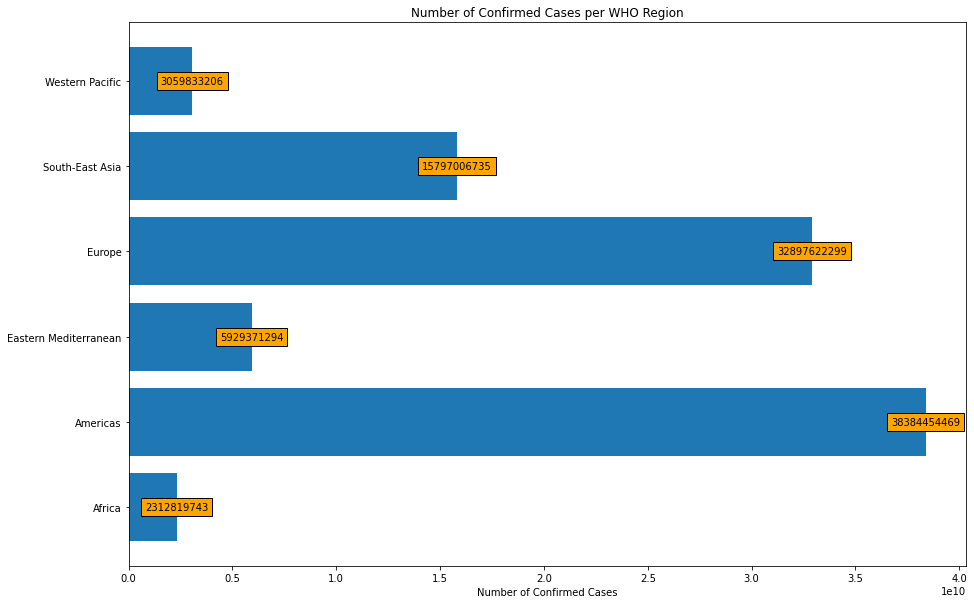

In [ ]:
labels = groupedbyWHO.index.tolist()
values = groupedbyWHO['Confirmed'].tolist()
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(labels, values)

for y, x in zip(labels, values):
  plt.text(x, y,  f"{x:.0f}", bbox=dict(facecolor='orange'), verticalalignment = "center", horizontalalignment = "center", fontsize = 10)

plt.xlabel("Number of Confirmed Cases")
plt.title("Number of Confirmed Cases per WHO Region")
plt.show()

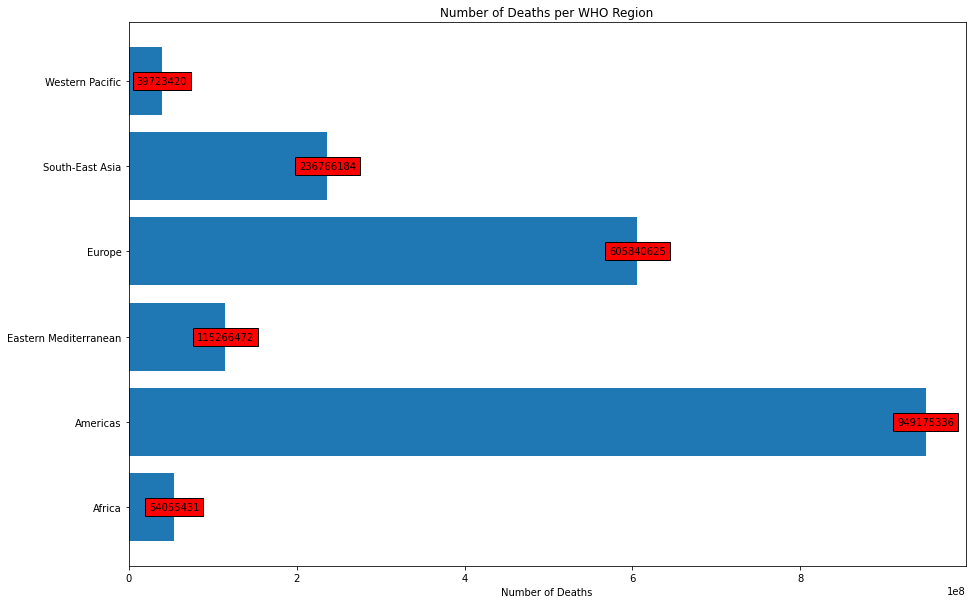

In [ ]:
labels = groupedbyWHO.index.tolist()
values = groupedbyWHO['Deaths'].tolist()
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(labels, values)

for y, x in zip(labels, values):
  plt.text(x, y,  f"{x:.0f}", bbox=dict(facecolor='red'), verticalalignment = "center", horizontalalignment = "center", fontsize = 10)

plt.xlabel("Number of Deaths")
plt.title("Number of Deaths per WHO Region")
plt.show()

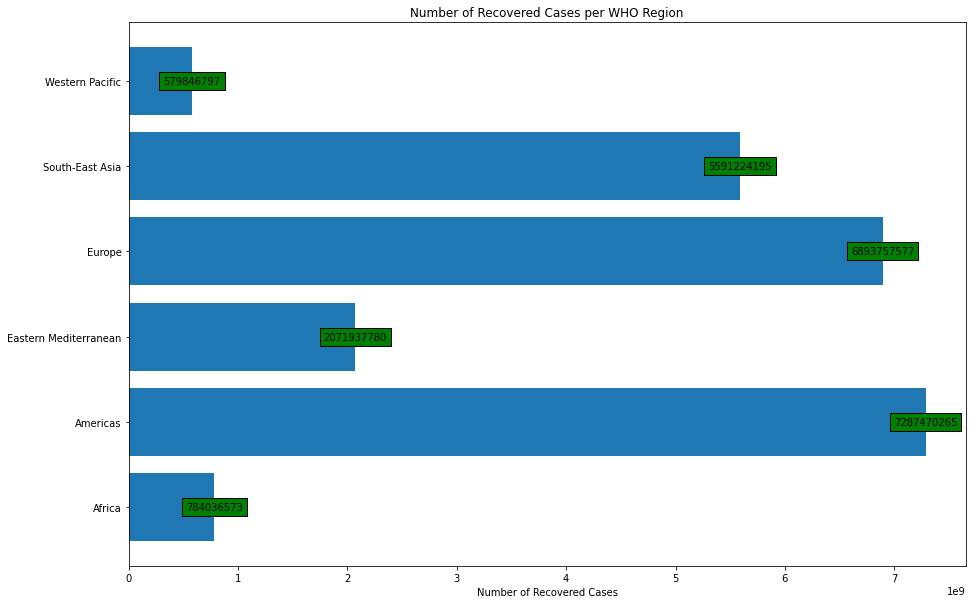

In [ ]:
labels = groupedbyWHO.index.tolist()
values = groupedbyWHO['Recovered'].tolist()
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(labels, values)

for y, x in zip(labels, values):
  plt.text(x, y,  f"{x:.0f}", bbox=dict(facecolor='green'), verticalalignment = "center", horizontalalignment = "center", fontsize = 10)

plt.xlabel("Number of Recovered Cases")
plt.title("Number of Recovered Cases per WHO Region")
plt.show()

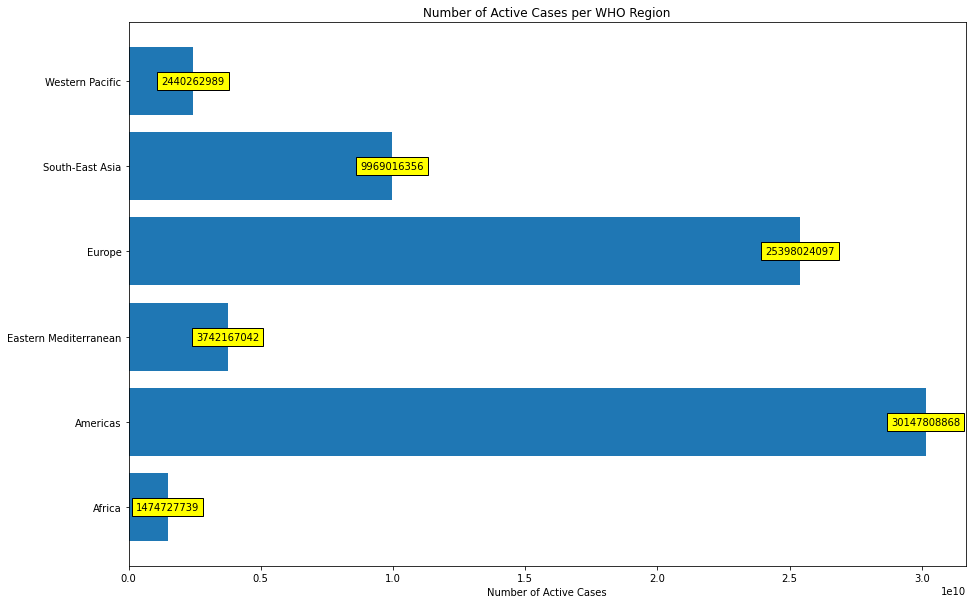

In [ ]:
labels = groupedbyWHO.index.tolist()
values = groupedbyWHO['Active'].tolist()
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(labels, values)

for y, x in zip(labels, values):
  plt.text(x, y,  f"{x:.0f}", bbox=dict(facecolor='yellow'), verticalalignment = "center", horizontalalignment = "center", fontsize = 10)

plt.xlabel("Number of Active Cases")
plt.title("Number of Active Cases per WHO Region")
plt.show()

These charts show us the fact that Americas and Europe got hit by COVID harder than any other region in the world. Considering that South-East Asia has an enormous population, the fact that their share of any type of COVID case being low show that they handled whole pandemic better than Europe and America. Especially in the deaths department, their numbers are very low compared to these big two.

### Comparison among provinces of Australia

As mentioned before, we selected Australia to compare its provinces because there are no missing province data in Australia. 

In [ ]:
provinces = df[df['Country/Region']=='Australia']['Province/State'].unique().tolist()
dfAus = df.groupby(by=['Country/Region','Province/State']).sum().loc['Australia']
dfAus

,Lat,Long,Confirmed,Deaths,Recovered,Active
Province/State,,,,,,
Australian Capital Territory,-27421.0155,115186.5852,2364037,4435,54282,2305320
New South Wales,-26180.5824,116884.7889,74295215,176008,281384,73837823
Northern Territory,-9634.2082,101143.6488,1346733,498,37114,1309121
Queensland,-21234.1554,118288.4023,24146690,19702,601131,23525857
South Australia,-26999.7305,107138.3411,6953252,9071,270264,6673917
Tasmania,-33147.8633,113883.9256,1924497,9292,101796,1813409
Victoria,-29229.9128,112056.4763,68352808,575111,7099128,60678569
Western Australia,-24697.7365,89560.1665,754192,6297,375995,371900


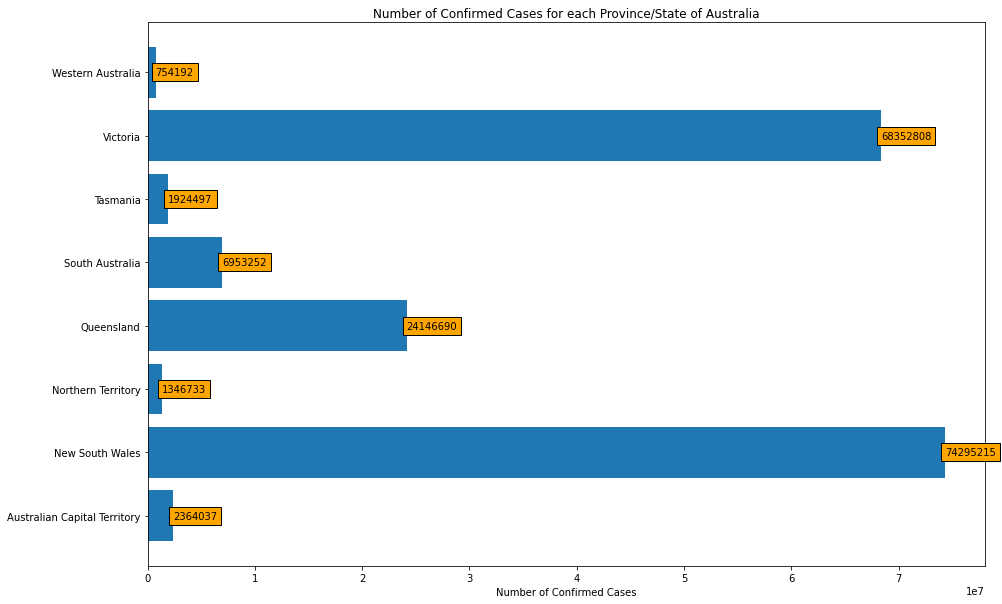

In [ ]:
labels = dfAus.index.tolist()
values = dfAus['Confirmed'].tolist()
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(labels, values)

for y, x in zip(labels, values):
  plt.text(x, y,  f"{x:.0f}", bbox=dict(facecolor='orange'), verticalalignment = "center", horizontalalignment = "left", fontsize = 10)

plt.xlabel("Number of Confirmed Cases")
plt.title("Number of Confirmed Cases for each Province/State of Australia")
plt.show()

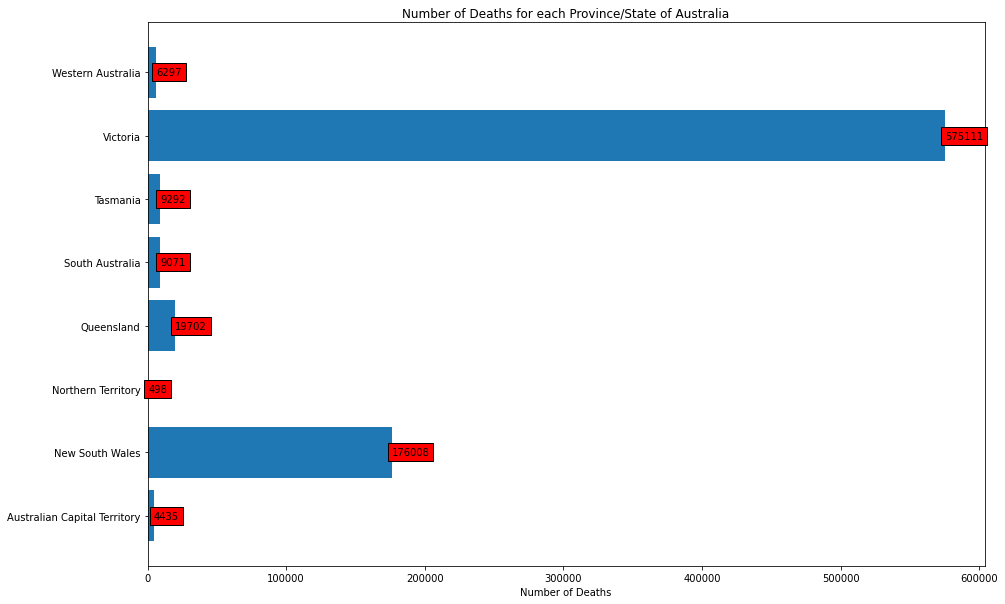

In [ ]:
labels = dfAus.index.tolist()
values = dfAus['Deaths'].tolist()
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(labels, values)

for y, x in zip(labels, values):
  plt.text(x, y,  f"{x:.0f}", bbox=dict(facecolor='red'), verticalalignment = "center", horizontalalignment = "left", fontsize = 10)

plt.xlabel("Number of Deaths")
plt.title("Number of Deaths for each Province/State of Australia")
plt.show()

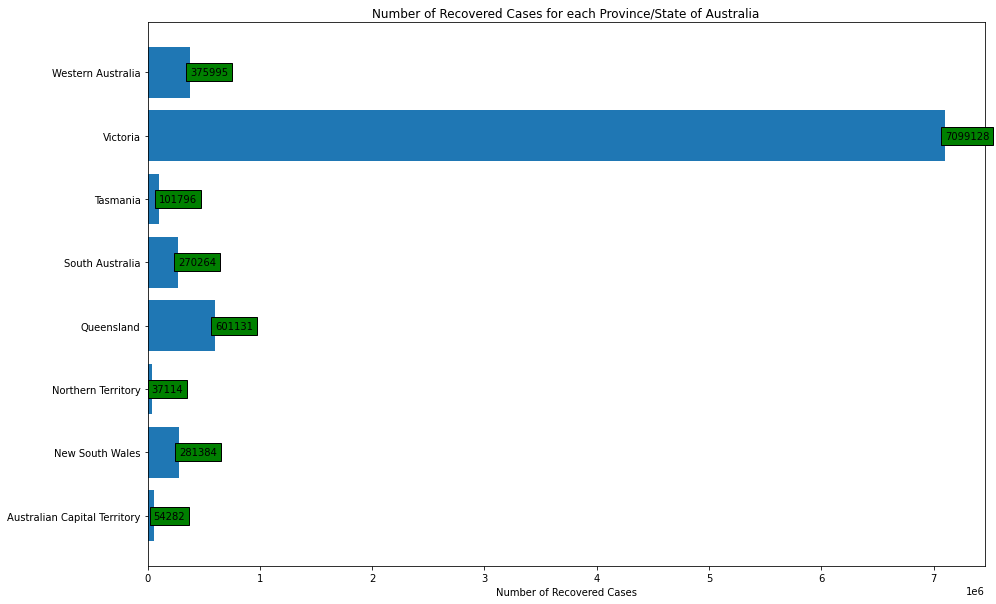

In [ ]:
labels = dfAus.index.tolist()
values = dfAus['Recovered'].tolist()
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(labels, values)

for y, x in zip(labels, values):
  plt.text(x, y,  f"{x:.0f}", bbox=dict(facecolor='green'), verticalalignment = "center", horizontalalignment = "left", fontsize = 10)

plt.xlabel("Number of Recovered Cases")
plt.title("Number of Recovered Cases for each Province/State of Australia")
plt.show()

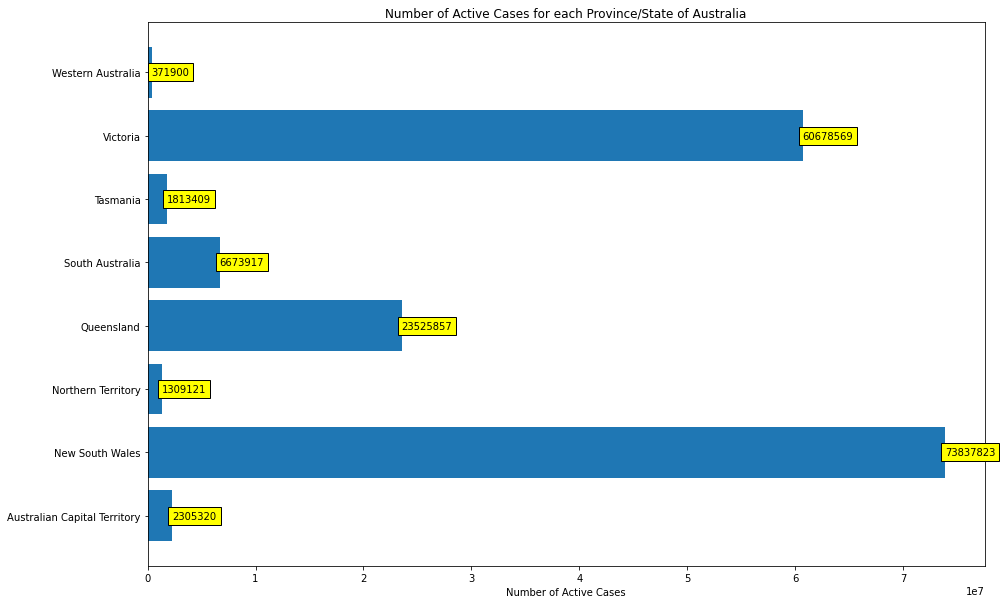

In [ ]:
labels = dfAus.index.tolist()
values = dfAus['Active'].tolist()
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(labels, values)

for y, x in zip(labels, values):
  plt.text(x, y,  f"{x:.0f}", bbox=dict(facecolor='yellow'), verticalalignment = "center", horizontalalignment = "left", fontsize = 10)

plt.xlabel("Number of Active Cases")
plt.title("Number of Active Cases for each Province/State of Australia")
plt.show()

By these charts, we can confirm that Victoria is the place where COVID-19 hit hardest in all Australia. It is interesting that both most recovered cases and death numbers are highest in this region. It is easy to make the mistake of confirming that Victoria has the best or the worst at healing patients by looking at these graphs one by one. In fact, it only shows that sheer number of cases are the highest in this region. In below bar chart, we can see the right tool to make deductions about each province.

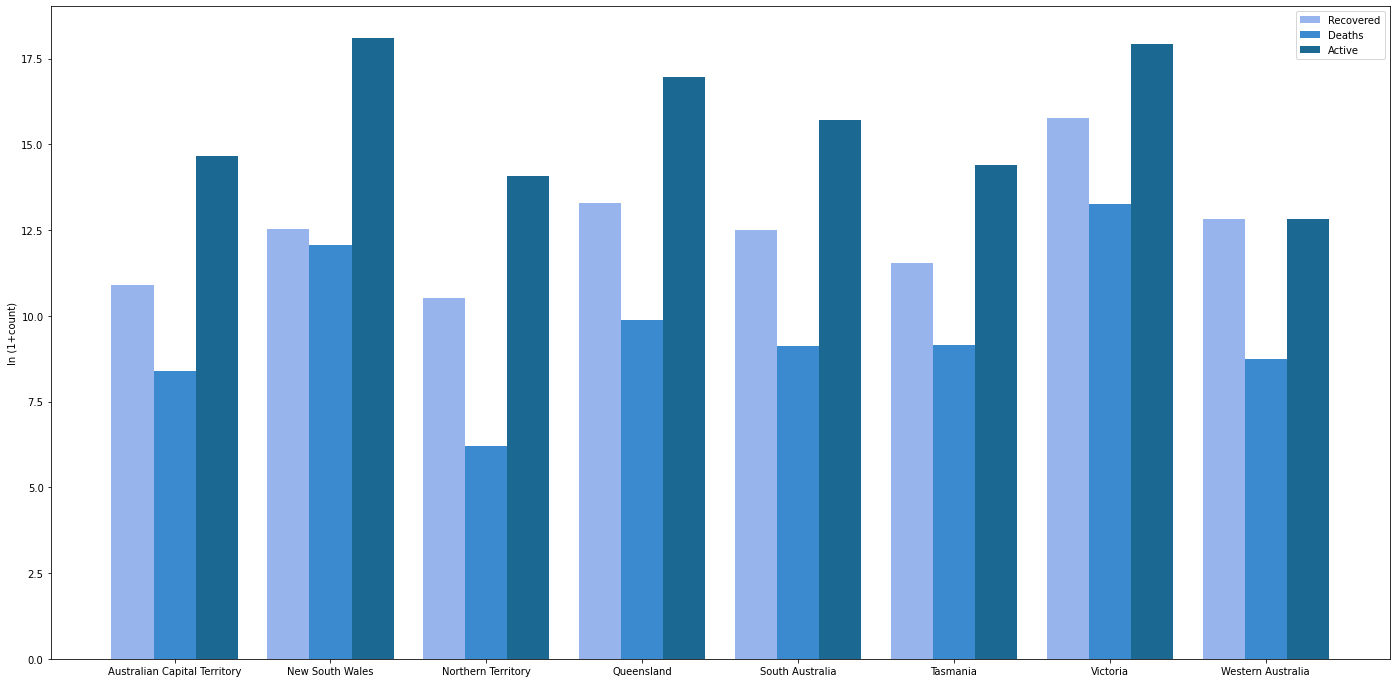

In [ ]:
X = dfAus.index.tolist()
ind = np.arange(len(X))

y = [[dfAus.loc[x].loc["Recovered"],dfAus.loc[x].loc["Deaths"],dfAus.loc[x].loc["Active"]] for x in X]

data = [k for k in y]

rec = [math.log(data[x][0]) for x in range(len(X))]
dea = [math.log(data[x][1]) for x in range(len(X))]
act = [math.log(data[x][2]) for x in range(len(X))]
width = 0.27 

fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, rec, width, color='#97b4ed')
rects2 = ax.bar(ind+width, dea, width, color='#3b89cf')
rects3 = ax.bar(ind+width*2, act, width, color='#1b6893')

ax.set_ylabel('ln (1+count)')
ax.set_xticks(ind+width)
ax.set_xticklabels(X)
ax.legend((rects1[0], rects2[0], rects3[0]), ('Recovered', 'Deaths', 'Active') )
plt.show()

As we can see from the above figure, almost all of the regions have mostly active patients. Of course one needs to include a temporal analysis of this data; however, we can still see that regional differences are mostly based on number of patients, not their fate!

### Temporal Analysis

In this section, we will look at different time points data in these points. Let's first divide whole time interval into 5 intervals with equal length. In here, 5 is a design choice. We tried some number of intervals and caught the balance of being informative and readability in the number five.

In [ ]:
all_dates = df['Date'].unique().tolist()
all_dates.sort()
all_dates[:10]

['2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31']

In [ ]:
def timeIntervals(times,n):
  return np.array_split(times,n)
chunks = timeIntervals(all_dates,5)

Firstly, we will show the state of pandemic in the world in terms of deaths at 6 different time points in the time. These time points will be starting points of all of these intervals as well as end of the last interval.

In [ ]:
def showTimeShot(myDate,what,factor):
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
  fig, ax = plt.subplots(figsize=(12, 6))
  worldmap.plot(color="lightgrey", ax=ax)
  x = df[df['Date']==myDate]['Long']
  y = df[df['Date']==myDate]['Lat']
  z = df[df['Date']==myDate][what]
  plt.scatter(x, y, s=z**factor, c=z, alpha=0.6, vmin=0, vmax=20, cmap='Reds')
  plt.colorbar(label='Death density')
  plt.xlim([-180, 180])
  plt.ylim([-90, 90])
  plt.title(what + ' counts all around the world at '+myDate)
  plt.xlabel("Longitude")
  plt.ylabel("Latitude")
  plt.show()

In [ ]:
#INSTALLING GEOPANDAS FOR VISUALIZING DATA ON THE WORLD MAP
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.0 MB/s 
     |████████████████████████████████| 6.3 MB 54.2 MB/s 
     |████████████████████████████████| 16.7 MB 34.4 MB/s 


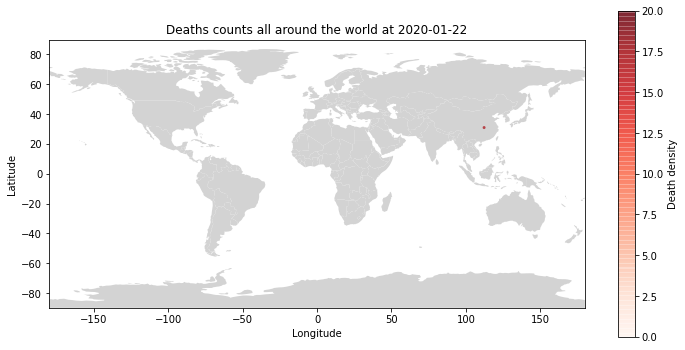

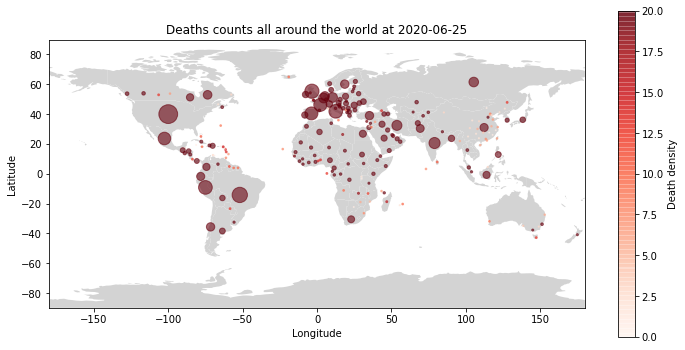

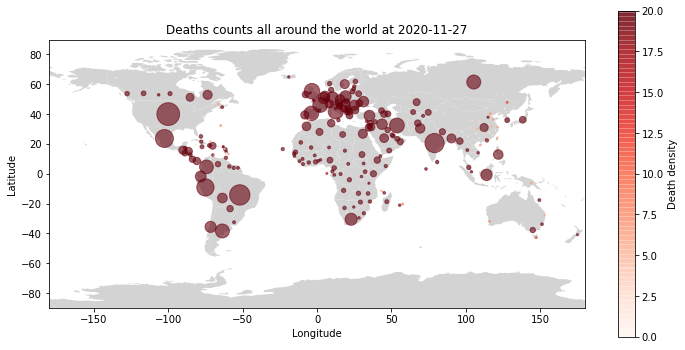

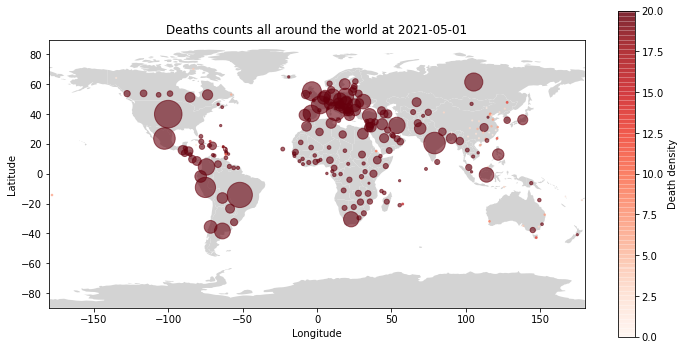

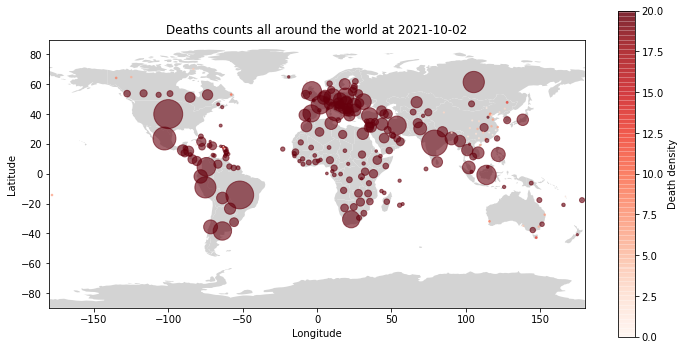

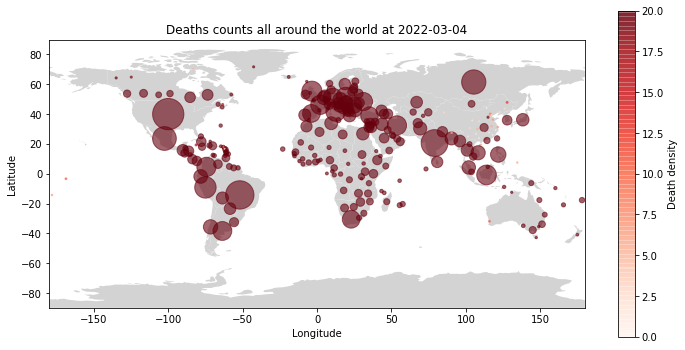

In [ ]:
factor = 1/2
for interval in chunks:
  showTimeShot(interval[0],'Deaths',factor)
showTimeShot(chunks[4][len(chunks[4])-1],'Deaths',factor)

It is clearly understood from the first table that the first death caused by the COVID-19 epidemic on January 22, 2020 took place in China. Then, when we look at the death table on 25 June 2020, it is seen that Europe is the leading country in all world statistics. A very high mortality rate compared to other regions is clearly indicated by the circles in the color 'Bordeaux'. At the same time, a faster increase is observed in the South and North American regions on this date compared to the previous one. Then, looking at the death records on the world map of 27 December 2020, the great death rate in Europe continued to increase, and greater increases were observed in the African continent and the Asian continent compared to the previous date. Especially in Turkey and its southeast, a large death rate has occurred. Finally, death rates in the Americas have also increased dramatically, spreading across the continent. When we look at the date of May 1, 2021, it is seen that the death rates reached the highest level in the European continent. Although there was not much increase in the African and Asian continents, there was a change. Finally, death rates in the Americas continue to increase, albeit at a slower pace. On October 2, 2021, the increase in the European continent continued to grow very much, and the density is almost 1-2 times the previous one. In addition, the death rates in the Asian and African continents, which did not increase much in the previous world map, showed a great increase. The increase in the Americas is increasing gradually, with a normal value. Unsurprisingly, the increases continued exponentially on the European continent on March 4, 2022. Mortality rates in the Americas continue to cover the entire continent. There is not much death data on the African continent compared to other continents. On the Asian continent, an average rate is seen, including the northern side of Russia. The fact that the death data in Africa is lower compared to others may be because the deaths there are not recorded due to technological difficulties or the areas where people will interact socially are less compared to others.

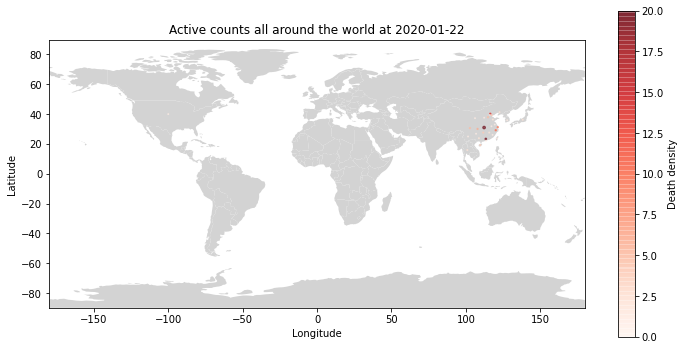

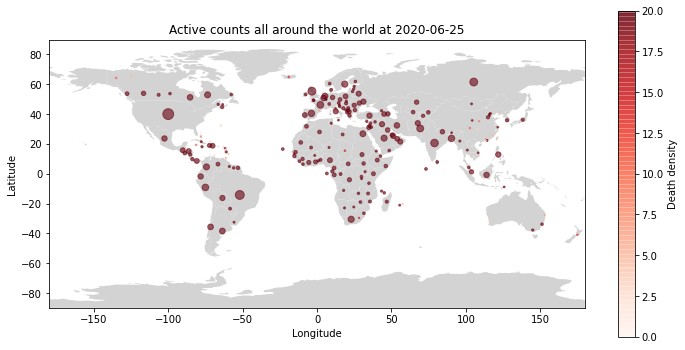

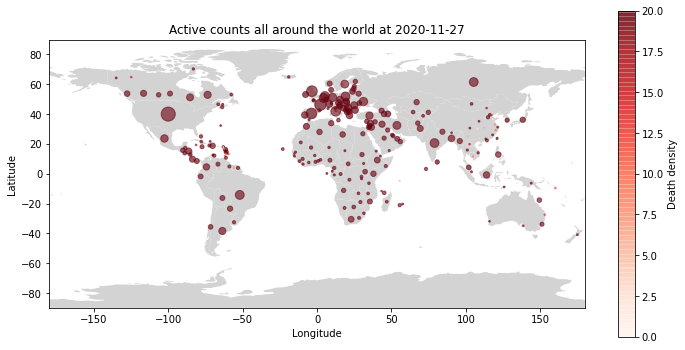

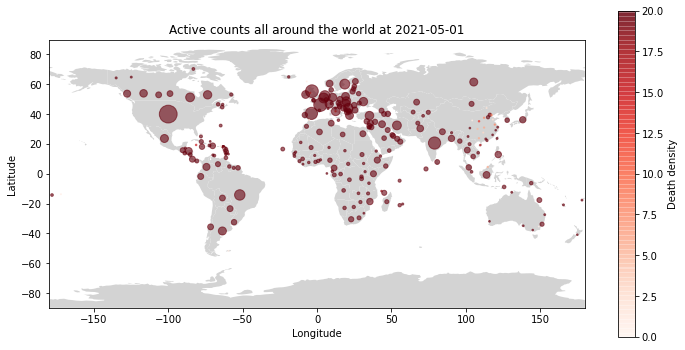

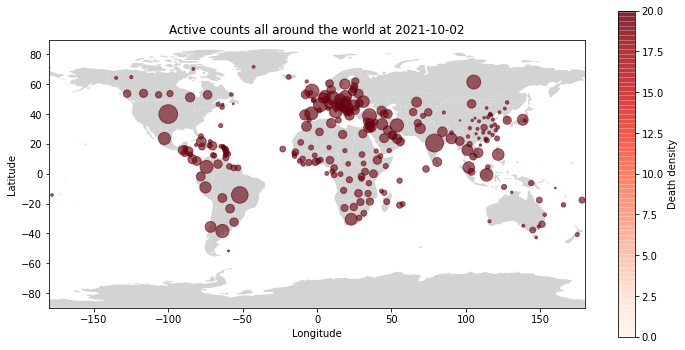

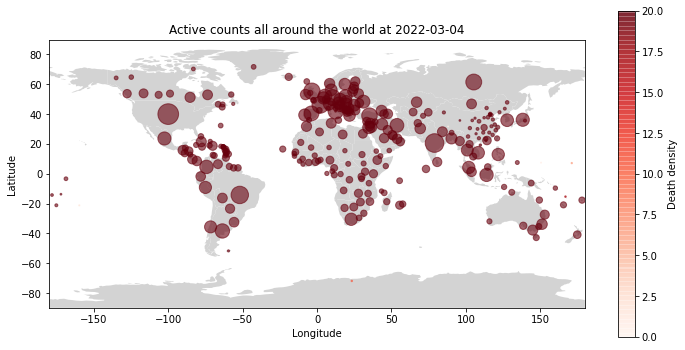

In [ ]:
factor = 1/3
for interval in chunks:
  showTimeShot(interval[0],'Active',factor)
showTimeShot(chunks[4][len(chunks[4])-1],'Active',factor)

On January 22, 2020, the first active cases in the world emerged from the Asian continent, where China is located. And on this date, no active cases were found outside of the Asian continent. On 25 June 2020, the number of active cases was revealed all over the world. It is clearly seen that the density shifted to Europe and America at this date. On 27 November 2020, it is seen that Europe is clearly dense and ahead in active case densities. Meanwhile, active cases were also depicted in Turkey and its surroundings. Active cases on other continents are not so much compared to Europe. On May 1, 2021, while the number of active cases in and around Turkey continues to increase, the density in the European region is constantly increasing. Although the number of active cases in America is high in places, it is more scattered. Active case rates in Africa are homogeneously distributed. The density rate in the Asian continent continues at a normal level. The intensity on October 2, 2021 provided a great advantage over previous dates. The density in Europe has reached its highest level. In addition, the increases in Asia, America and Africa were more concentrated and spread over wider regions. Rates in South America have increased. They have emerged as rivals to Europe by experiencing a great increase in Turkey and the surrounding region.

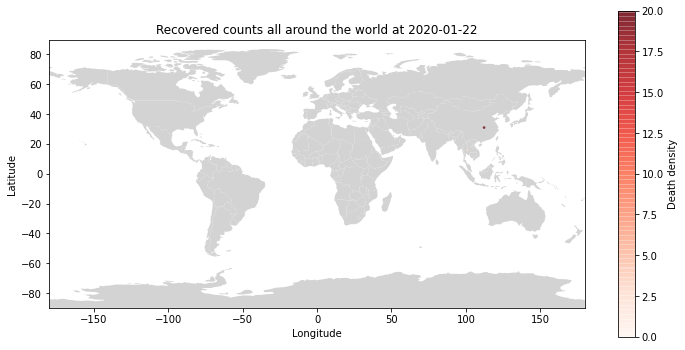

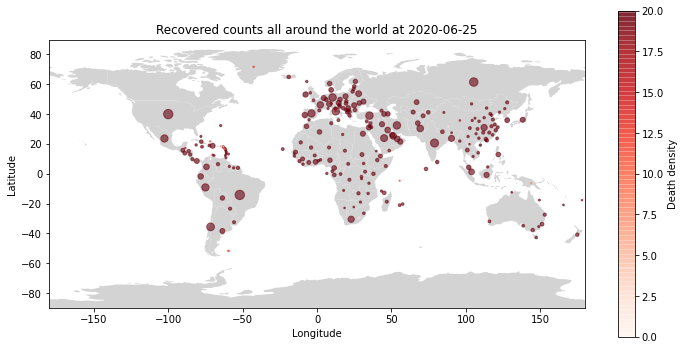

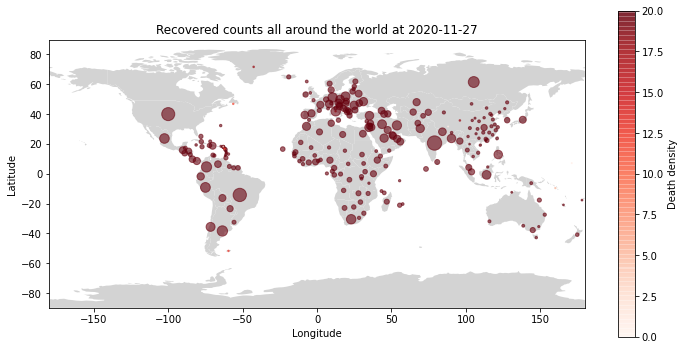

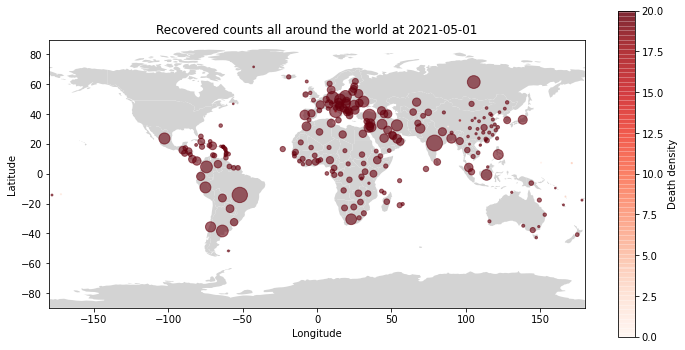

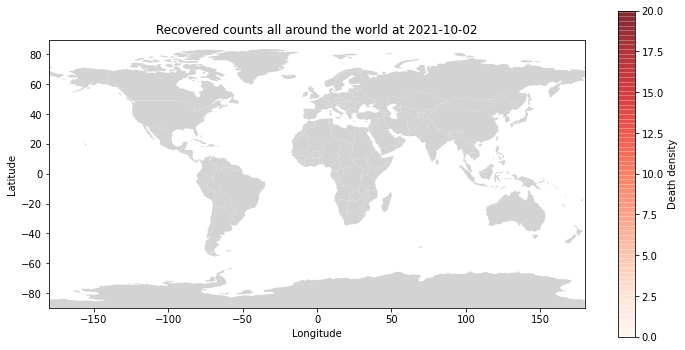

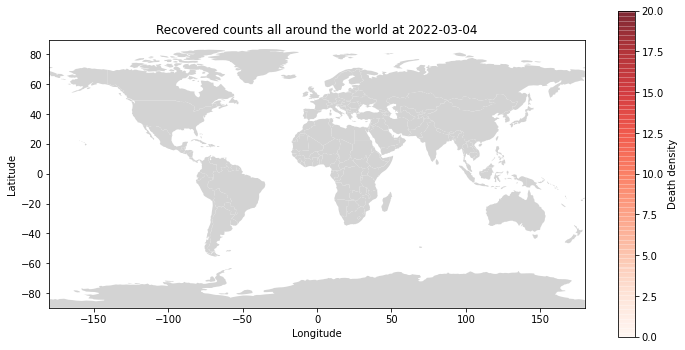

In [ ]:
factor = 1/3
for interval in chunks:
  showTimeShot(interval[0],'Recovered',factor)
showTimeShot(chunks[4][len(chunks[4])-1],'Recovered',factor)

On January 22, 2020, "Recovered Counts" data were found only in China, located in the Asian Continent. On June 25, 2020, it took place in Asia and the Americas, although mostly in Europe. Then, on November 27, 2020, recovered case data in Europe experienced a huge increase, with the probability of confirmed cases being very high. In addition, a large ratio of recovered cases was found in the South American region, the Asian region and around Turkey. On May 1, 2021, these recovered case rates continued to increase. Recovered cases have been found in dense forms in all regions, including Africa. It seems that the density is experienced in Europe at the maximum and then in Turkey and its surroundings. Finally, in this part of the project, it is clearly seen that there is no data when looking at the last 2 date groupings. The reason for these dataless and nothing maps is that the data becomes "Outlier" after a while. In this part of the project, the recovered cases and their ratios, which were examined on the whole world map, were thus completed.

In [ ]:
df[df['Date'] == '2021-08-04']['Recovered']

155680     82586
155681    130314
155682    118409
155683     14380
155684     39582
           ...  
155953    312320
155954         0
155955      4251
155956    189658
155957     82994
Name: Recovered, Length: 278, dtype: int64

In [ ]:
df[df['Date'] == '2021-08-05']['Recovered']

155958    0
155959    0
155960    0
155961    0
155962    0
         ..
156231    0
156232    0
156233    0
156234    0
156235    0
Name: Recovered, Length: 278, dtype: int64

###Comparison of Deaths and Confirmed Cases

In [ ]:
dfAus = groupedbyWHO.groupby(by=['WHO Region']).sum().loc['Africa']
dfAus
groupedbyWHO = df.groupby(by=['WHO Region']).sum()
groupedbyWHO

,Lat,Long,Confirmed,Deaths,Recovered,Active
WHO Region,,,,,,
Africa,7.190562e+02,5.929476e+05,2312819743,54055431,784036573,1474727739
Americas,7.180205e+05,-2.820608e+06,38384454469,949175336,7287470265,30147808868
Eastern Mediterranean,4.449064e+05,6.980888e+05,5929371294,115266472,2071937780,3742167042
Europe,2.400608e+06,2.832318e+05,32897622299,605840625,6893757577,25398024097
South-East Asia,1.075693e+05,7.224401e+05,15797006735,236766184,5591224195,9969016356
Western Pacific,7.050272e+05,5.158363e+06,3059833206,39723420,579846797,2440262989


In [ ]:
dfafrica = df.loc[df['WHO Region'] == 'Africa']
dfAf = dfafrica.groupby(by=['Date']).sum()
dfAf

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,0.930215,767.073219,0,0,0,0
2020-01-23,0.930215,767.073219,0,0,0,0
2020-01-24,0.930215,767.073219,0,0,0,0
2020-01-25,0.930215,767.073219,0,0,0,0
2020-01-26,0.930215,767.073219,0,0,0,0
...,...,...,...,...,...,...
2022-02-28,0.930215,767.073219,7995660,169153,0,7826507
2022-03-01,0.930215,767.073219,7998648,169178,0,7829470
2022-03-02,0.930215,767.073219,8001845,169224,0,7832621


In [ ]:
first = pd.to_datetime(dfAf.index[0])
last = pd.to_datetime(dfAf.index[-1])
diff = (last-first).days
delt = diff//4
print(f'First date is {first.date()}, and the last date is {last.date()}\nDays passed {diff}\n')

datelistAf = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

print(datelistAf)

First date is 2020-01-22, and the last date is 2022-03-04
Days passed 772

['2020-01-22', '2020-08-02', '2021-02-11', '2021-08-23', '2022-03-04']


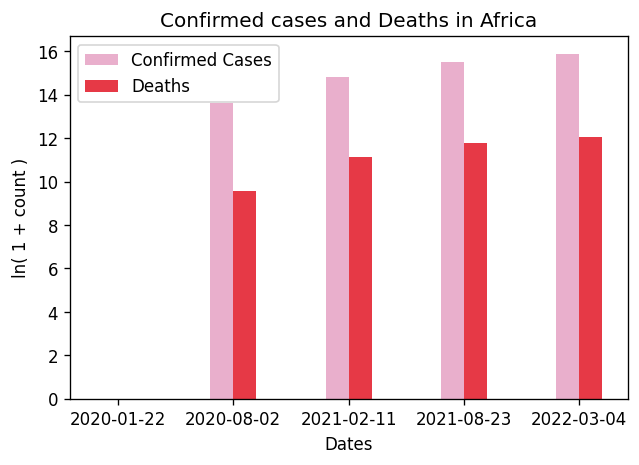

In [ ]:
X = datelistAf
lendate = len(datelistAf)

y = [ [dfAf.loc[x].loc["Confirmed"], dfAf.loc[x].loc["Deaths"]] for x in X]

'''
Without logarithmic implementation
conf = [x[0] for x in y]
dea = [x[1] for x in y]
'''
#With logarithmic implementation (visualization is more correct)
conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in Africa')
plt.bar(x1,conf,width,color='#e9afcc',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#e63946',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistAf)
plt.show()

"Confirmed Case" and "Deaths" data were not disclosed on 22 January 2020 in this region. On August 2, 2020, less confirmed case data were announced than in all other regions, except for the Western Pacific region, and the death rate is considerably lower than the others. When looking at other dates in general, the confirmed case data was relatively low. It is also positioned as one of the lowest among WHO Regions in terms of mortality rate. The reason why so few confirmed cases and deaths are announced can be explained with a subjective interpretation as follows; As we mentioned in our analyzes above, there is less intense interaction in terms of social life interaction and the areas where people operate in the African Continent. In addition, it may be that the data is not transferred correctly due to the technological, social and health underdevelopment in the African continent.

In [ ]:
y = [ [dfAf.loc[x].loc["Confirmed"], dfAf.loc[x].loc["Deaths"]] for x in X]
conf = [x[0] for x in y]
dea = [x[1] for x in y]
dea

[0.0, 14019.0, 67474.0, 130798.0, 169324.0]

In [ ]:
dfamerica = df.loc[df['WHO Region'] == 'Americas']
dfAm = dfamerica.groupby(by=['Date']).sum()
dfAm

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,928.875196,-3648.910763,1,0,0,1
2020-01-23,928.875196,-3648.910763,3,0,0,3
2020-01-24,928.875196,-3648.910763,5,0,0,5
2020-01-25,928.875196,-3648.910763,5,0,0,5
2020-01-26,928.875196,-3648.910763,8,0,0,8
...,...,...,...,...,...,...
2022-02-28,928.875196,-3648.910763,147125906,2634246,0,144491660
2022-03-01,928.875196,-3648.910763,147230375,2636944,0,144593431
2022-03-02,928.875196,-3648.910763,147380633,2639862,0,144740771


In [ ]:
first = pd.to_datetime(dfAm.index[0])
last = pd.to_datetime(dfAm.index[-1])
diff = (last-first).days
delt = diff//4
print(f'The first date is {first.date()}, and the last date is {last.date()}\nDays passed {diff}\n')

datelistAm = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

print(datelistAm)

The first date is 2020-01-22, and the last date is 2022-03-04
Days passed 772

['2020-01-22', '2020-08-02', '2021-02-11', '2021-08-23', '2022-03-04']


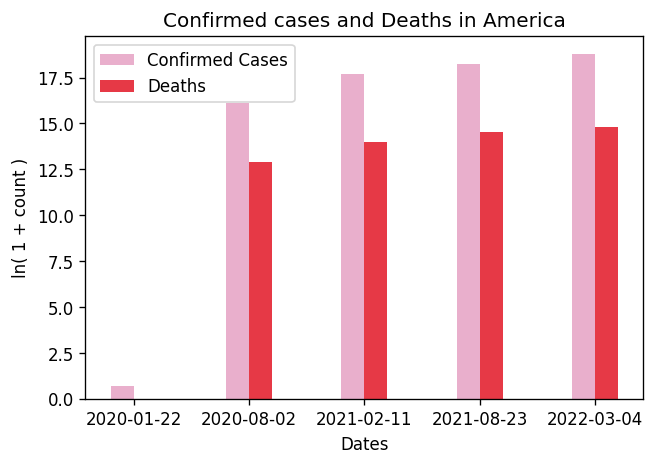

In [ ]:
X = datelistAm
lendate = len(datelistAm)

y = [ [dfAm.loc[x].loc["Confirmed"], dfAm.loc[x].loc["Deaths"]] for x in X]

#With logarithmic implementation (visualization is more correct)
conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in America')
plt.bar(x1,conf,width,color='#e9afcc',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#e63946',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistAm)
plt.show()

First, the "Natural Logarithm" method was used to transfer the "Confirmed Case" and "Deaths" data in WHO Regions to bar charts properly. As for the comparison of the data; It is seen that there is a certain confirmed case in the Americas on January 22, 2020, but there has been no death yet. On August 2, 2020, confirmed cases reached a high point and a half death rate was realized in response to these cases. When we look at the date of February 11, 2022, it is observed that confirmed cases have increased, although not excessively, compared to the previous date, and at the same time, it is observed that death rates are increasing gradually. On August 23, 2022, the number of confirmed cases and deaths has been steadily increasing. Finally, on March 4, 2022, death rates and confirmed cases continued to rise. In summary, net increases in confirmed cases and deaths by date have been observed continuously and upwards after the first announcement of the Covid-19 case in the America

In [ ]:
dfEa = df.loc[df['WHO Region'] == 'Eastern Mediterranean']
dfEa = dfEa.groupby(by=['Date']).sum()
dfEa

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,575.558091,903.090238,0,0,0,0
2020-01-23,575.558091,903.090238,0,0,0,0
2020-01-24,575.558091,903.090238,0,0,0,0
2020-01-25,575.558091,903.090238,0,0,0,0
2020-01-26,575.558091,903.090238,0,0,0,0
...,...,...,...,...,...,...
2022-02-28,575.558091,903.090238,21190556,334015,0,20856541
2022-03-01,575.558091,903.090238,21218603,334383,0,20884220
2022-03-02,575.558091,903.090238,21238270,334742,0,20903528


In [ ]:
first = pd.to_datetime(dfEa.index[0])
last = pd.to_datetime(dfEa.index[-1])
diff = (last-first).days
delt = diff//4
print(f'The first date is {first.date()}, and the last date is {last.date()}\nDays passed {diff}\n')

datelistEa = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

print(datelistEa)

The first date is 2020-01-22, and the last date is 2022-03-04
Days passed 772

['2020-01-22', '2020-08-02', '2021-02-11', '2021-08-23', '2022-03-04']


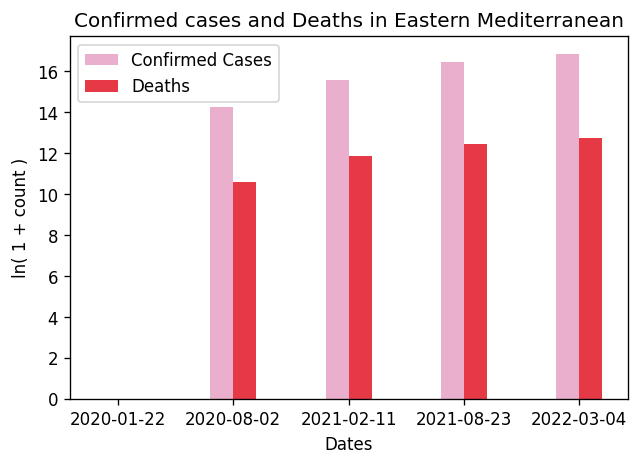

In [ ]:
X = datelistEa
lendate = len(datelistEa)

y = [ [dfEa.loc[x].loc["Confirmed"], dfEa.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in Eastern Mediterranean')
plt.bar(x1,conf,width,color='#e9afcc',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#e63946',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistEa)
plt.show()

On January 22, 2022, when confirmed cases were announced in the Americas in this region, it is seen that no concrete Covid-19 case has been encountered yet. On August 2, 2020, fewer confirmed cases were encountered than in the Americas. As a result, the death rate is also lower. Looking at the date of February 11, 2021, it is similar to the American continent in terms of confirmed case and death rate. Looking at the dates of August 23, 2021 and March 4, 2022, as a general opinion, it is observed that there has been a continuous and upward increase in the Eastern Mediterranean region since the announcement of the confirmed cases. In addition, it is observed that even if the death rate increases, it is increasing more slowly than the rate in the Americas.

In [ ]:
dfEu = df.loc[df['WHO Region'] == 'Europe']
dfEu = dfEu.groupby(by=['Date']).sum()
dfEu

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,3105.572904,366.405899,0,0,0,0
2020-01-23,3105.572904,366.405899,0,0,0,0
2020-01-24,3105.572904,366.405899,2,0,0,2
2020-01-25,3105.572904,366.405899,3,0,0,3
2020-01-26,3105.572904,366.405899,3,0,0,3
...,...,...,...,...,...,...
2022-02-28,3105.572904,366.405899,180318054,1875485,0,178442569
2022-03-01,3105.572904,366.405899,181105995,1879027,0,179226968
2022-03-02,3105.572904,366.405899,181913298,1882162,0,180031136


In [ ]:
first = pd.to_datetime(dfEa.index[0])
last = pd.to_datetime(dfEa.index[-1])
diff = (last-first).days
delt = diff//4
print(f'The first date is {first.date()}, and the last date is {last.date()}\nDays passed {diff}\n')

datelistEu = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

print(datelistEu)

The first date is 2020-01-22, and the last date is 2022-03-04
Days passed 772

['2020-01-22', '2020-08-02', '2021-02-11', '2021-08-23', '2022-03-04']


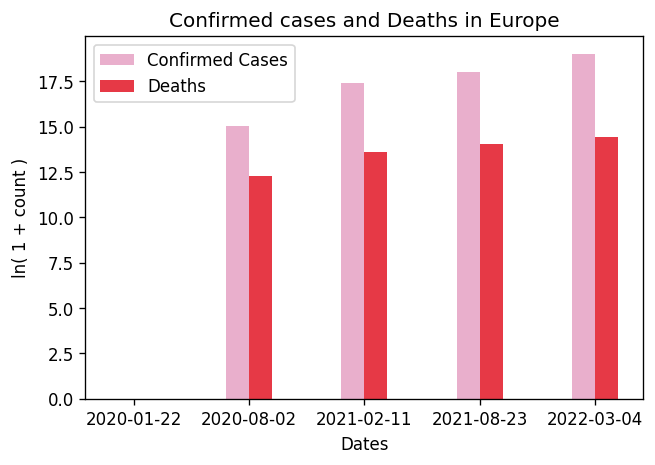

In [ ]:
X = datelistEu
lendate = len(datelistEu)

y = [ [dfEu.loc[x].loc["Confirmed"], dfEu.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in Europe')
plt.bar(x1,conf,width,color='#e9afcc',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#e63946',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistEu)
plt.show()

When the density ratio on the world map above is considered, the European continent has been the place where the COVID-19 case was observed most intensely. When the "Confirmed Cases" and "Deaths" ratios for the European continent are examined, it is seen that no confirmed cases such as Africa and Eastern Mediterranean were announced on 22 January 2020. However, when we look at the dates of August 2, 2020, February 11, 2021, August 23, 2021, and finally March 4, 2022, a higher death rate and number of confirmed cases were observed, unlike the African and Eastern Mediterranean continents previously examined. It is proportionally similar to the American continent. These increases in the European continent are similar to all other bar charts, and there has been a continuous and upward increase.

In [ ]:
dfsouth = df.loc[df['WHO Region'] == 'South-East Asia']
dfSo = dfsouth.groupby(by=['Date']).sum()
dfSo

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,139.158153,934.592657,4,0,2,2
2020-01-23,139.158153,934.592657,4,0,2,2
2020-01-24,139.158153,934.592657,5,0,3,2
2020-01-25,139.158153,934.592657,7,0,3,4
2020-01-26,139.158153,934.592657,9,0,6,3
...,...,...,...,...,...,...
2022-02-28,139.158153,934.592657,55747493,762285,0,54985208
2022-03-01,139.158153,934.592657,55827441,762957,0,55064484
2022-03-02,139.158153,934.592657,55902944,763562,0,55139382


In [ ]:
first = pd.to_datetime(dfSo.index[0])
last = pd.to_datetime(dfSo.index[-1])
diff = (last-first).days
delt = diff//4
print(f'The first date is {first.date()}, and the last date is {last.date()}\nDays passed {diff}\n')

datelistSo = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

print(datelistSo)

The first date is 2020-01-22, and the last date is 2022-03-04
Days passed 772

['2020-01-22', '2020-08-02', '2021-02-11', '2021-08-23', '2022-03-04']


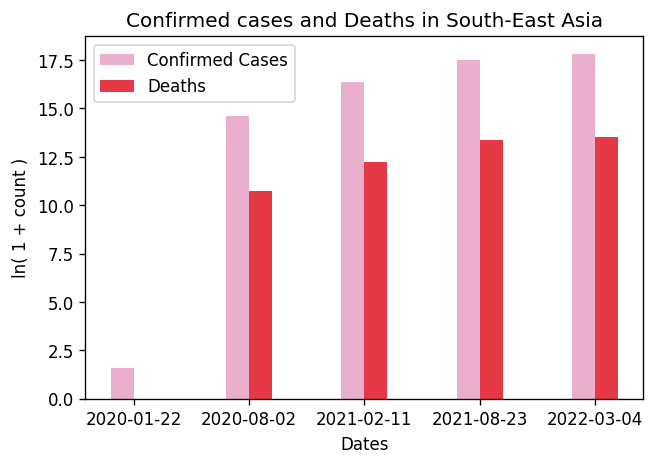

In [ ]:
X = datelistSo
lendate = len(datelistSo)

y = [ [dfSo.loc[x].loc["Confirmed"], dfSo.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in South-East Asia')
plt.bar(x1,conf,width,color='#e9afcc',label='Confirmed Cases') 
plt.bar(x2,dea,width,color='#e63946',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistSo)
plt.show()

It is seen that "Confirmed Case" was announced on January 22, 2020, similar to the USA in this region. However, a larger proportion of data was disclosed than the cases announced in the USA. Then, when the dates are examined in order, a general conclusion can be reached. "Confirmed Case" and "Deaths" data in this region also showed a continuous and upward increase depending on the dates. Also, the proportional figures in this region are larger. Confirmed case rate shows a larger increase compared to many other regions. However, the rate of death rates increased in a similar way, although not more. A subjective comment that can be taken from this bar chart is as follows; The development in this region, the technology and facilities of the hospitals may be more. 

In [ ]:
dfwestern = df.loc[df['WHO Region'] == 'Western Pacific']
dfWe = dfwestern.groupby(by=['Date']).sum()
dfWe

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,912.066187,6673.173574,552,17,28,507
2020-01-23,912.066187,6673.173574,650,18,30,602
2020-01-24,912.066187,6673.173574,932,26,36,870
2020-01-25,912.066187,6673.173574,1422,42,39,1341
2020-01-26,912.066187,6673.173574,2100,56,50,1994
...,...,...,...,...,...,...
2022-02-28,912.066187,6673.173574,24605776,181614,0,24424162
2022-03-01,912.066187,6673.173574,25139239,182170,0,24957069
2022-03-02,912.066187,6673.173574,25734757,183052,0,25551705


In [ ]:
first = pd.to_datetime(dfWe.index[0])
last = pd.to_datetime(dfWe.index[-1])
diff = (last-first).days
delt = diff//4
print(f'The first date is {first.date()}, and the last date is {last.date()}\nDays passed {diff}\n')

datelistWe = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

print(datelistWe)

The first date is 2020-01-22, and the last date is 2022-03-04
Days passed 772

['2020-01-22', '2020-08-02', '2021-02-11', '2021-08-23', '2022-03-04']


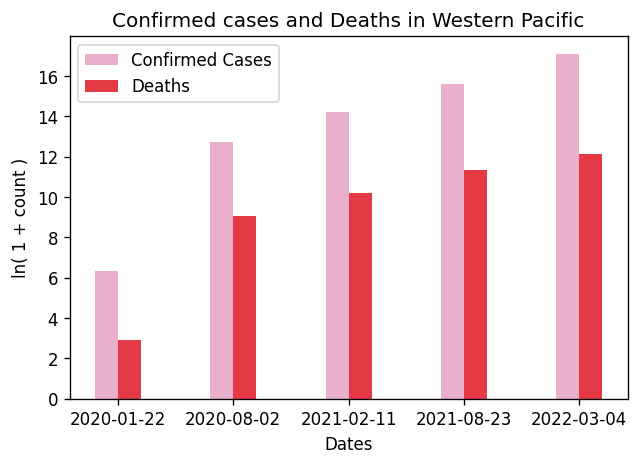

In [ ]:
X = datelistWe
lendate = len(datelistWe)

y = [ [dfWe.loc[x].loc["Confirmed"], dfWe.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in Western Pacific')
plt.bar(x1,conf,width,color='#e9afcc',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#e63946',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistWe)
plt.show()

When we look at the "Confirmed Case" and "Deaths" rates of this region, it can be seen where and how the COVID-19 pandemic originated. When we look at the date of January 22, 2020, it is clearly seen that the Western Pacific region has the most "Confirmed Case" - "Deaths" data, by far, according to all the regions we have compared in this section. In addition, the confirmed case and death rate due to the new discovery of this disease are quite high. In addition, as a general opinion; The confirmed case data in this region was the most linear and smoother bar chart compared to the others. It emerged by rising at a certain point without slowing down or increasing excessively. In addition, since this pandemic first emerged in this region, the death rates seem low compared to the confirmed case rates. Finally, when compared to the Americas and the European continents, the death rate was located at a lower rate and showed similarities with other regions.

###Provinces of a Country - Death and Confirmed Cases by Time

In this section, "Death Cases" and "Confirmed Cases" in the provinces/states of Australia

First of all, a "Data Frame" has been created to compare the death and case rates of the states in this country. And with the correction of these data, new bar charts were created using "Natural Logarithm". "Confirmed Cases" and "Death Cases" will be compared via these bar charts.

In [ ]:
dfAus

Lat          7.190562e+02
Long         5.929476e+05
Confirmed    2.312820e+09
Deaths       5.405543e+07
Recovered    7.840366e+08
Active       1.474728e+09
Name: Africa, dtype: float64

In [ ]:
provincesofAus= df.loc[df['Country/Region'] == 'Australia']  #dateandataofprovinces
provinces = df[df['Country/Region']=='Australia']['Province/State'].unique().tolist() #provinces names
dfAus = df.groupby(by=['Country/Region','Province/State']).sum().loc['Australia'] #sum of province's datas without date
provincesofAus

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
9,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific
10,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific
11,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific
12,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific
13,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
214628,Queensland,Australia,-27.4698,153.0251,2022-03-04,585499,589,0,584910,Western Pacific
214629,South Australia,Australia,-34.9285,138.6007,2022-03-04,158707,188,0,158519,Western Pacific
214630,Tasmania,Australia,-42.8821,147.3272,2022-03-04,49708,26,0,49682,Western Pacific
214631,Victoria,Australia,-37.8136,144.9631,2022-03-04,1073518,2590,0,1070928,Western Pacific


In [ ]:
provinces

['Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia']

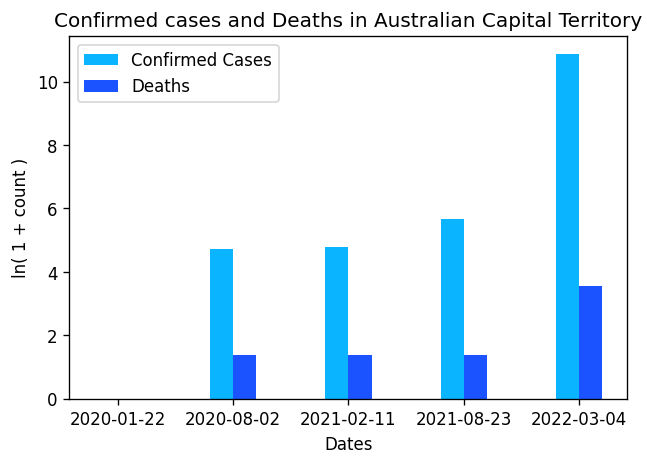

In [ ]:
#arrange the data
dfCapital = provincesofAus.loc[provincesofAus['Province/State'] == 'Australian Capital Territory']
dfCap = dfCapital.groupby(by=['Date']).sum()
dfCap

#make more tidy
first = pd.to_datetime(dfCap.index[0])
last = pd.to_datetime(dfCap.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistCap = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistCap
lendate = len(datelistCap)

y = [ [dfCap.loc[x].loc["Confirmed"], dfCap.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in Australian Capital Territory')
plt.bar(x1,conf,width,color='#0bb4ff',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#1a53ff',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistCap)
plt.show()

First of all, on January 22, 2020, no confirmed case data was found in this state, as in every state in the Continent of Australia. At the time the Covid-19 pandemic was first announced, it seems that there was no situation in this continent. Afterwards, on August 2, 2020, a lower rate is seen, unlike our bar charts in the previous WHO regions. Not only when compared to other countries or continents, but also within itself, it is seen that death rates are lower than confirmed cases. On February 11, 2021, with the slight increase in confirmed cases, the death rates are almost at the same point and there is no progress. Although it is examined that the confirmed cases increased slightly on August 23, 2021, it is seen that the death rates remained at the same levels compared to the previous dates. Finally, contrary to the data in all previous dates, a 2-fold increase was observed on March 4, 2022, and at the same time, it is seen that death rates increasedalmost 2-fold. The disease continued in this state, with almost the same course, without much fluctuation, even until a certain date.

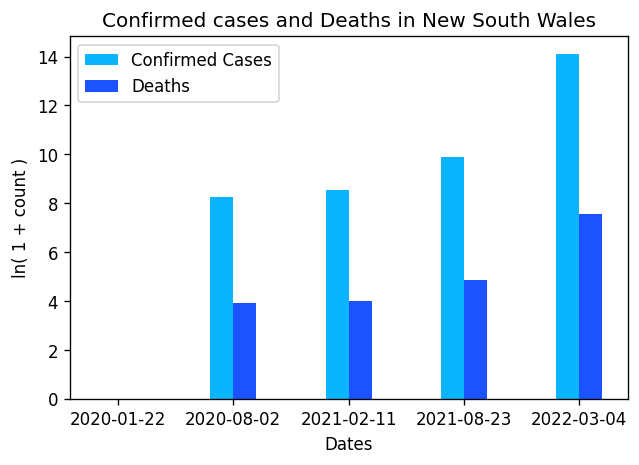

In [ ]:
#arrange the data
dfNewSouth = provincesofAus.loc[provincesofAus['Province/State'] == 'New South Wales']
dfNew = dfNewSouth.groupby(by=['Date']).sum()
dfNew

#make more tidy
first = pd.to_datetime(dfNew.index[0])
last = pd.to_datetime(dfNew.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistNew = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistNew
lendate = len(datelistNew)

y = [ [dfNew.loc[x].loc["Confirmed"], dfNew.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in New South Wales')
plt.bar(x1,conf,width,color='#0bb4ff',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#1a53ff',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistNew)
plt.show()

On January 22, 2020, there was no confirmed case or death case for this state either. On August 2, 2020, there was a great increase compared to the previous state. These increases, which were almost doubled, were reflected in the death rates in the same way. On February 11, 2022 and August 23, 2021, confirmed case and death rates increased without experiencing an excessive increase. The death rate is increasing. Finally, on March 4, 2022, confirmed cases and death cases underwent a larger change than other dates, reaching their maximum. Likewise, death rates have increased as well. However, when looked at, there is not much closeness between confirmed cases and death rates, and most of the confirmed cases did not turn into deaths. In general this state has almost half the rate.

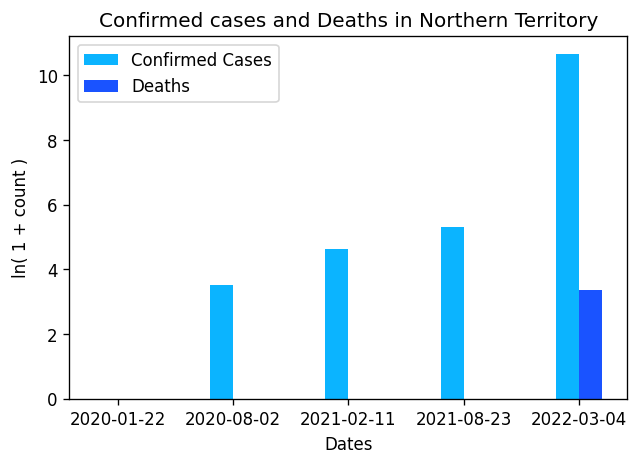

In [ ]:
#arrange the data
dfNorthern = provincesofAus.loc[provincesofAus['Province/State'] == 'Northern Territory']
dfNorth = dfNorthern.groupby(by=['Date']).sum()
dfNorth

#make more tidy
first = pd.to_datetime(dfNorth.index[0])
last = pd.to_datetime(dfNorth.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistNorth = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistNorth
lendate = len(datelistNorth)

y = [ [dfNorth.loc[x].loc["Confirmed"], dfNorth.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in Northern Territory')
plt.bar(x1,conf,width,color='#0bb4ff',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#1a53ff',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistNorth)
plt.show()

On January 22, 2020, no confirmed cases and death cases were announced for this state either. In addition, even if confirmed cases were announced until March 4, 2022, death data were not found. In addition, the rates of "Confirmed Cases" encountered until this date were considerably lower than the previous states. Finally, on March 4, 2022, confirmed cases rose sharply, almost doubling from previous dates. The death rate, on the other hand, has increased slightly, if not completely. According to the described cases, deaths occurring in this state are quite low.

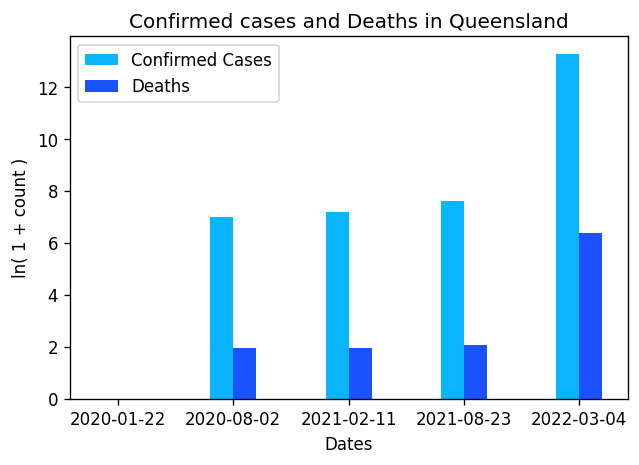

In [ ]:
#arrange the data
dfQueens = provincesofAus.loc[provincesofAus['Province/State'] ==  'Queensland']
dfQue = dfQueens.groupby(by=['Date']).sum()
dfQue

#make more tidy
first = pd.to_datetime(dfQue.index[0])
last = pd.to_datetime(dfQue.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistQue= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistQue
lendate = len(datelistQue)

y = [ [dfQue.loc[x].loc["Confirmed"], dfQue.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in Queensland')
plt.bar(x1,conf,width,color='#0bb4ff',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#1a53ff',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistQue)
plt.show()

On January 22, 2020, no confirmed cases and death cases were announced for this state either. On August 2, 2020, confirmed cases and death cases increased. On February 11, 2021 and August 23, 2021, these confirmed cases and death rates remained largely the same as on August 2, 2020. Finally, on March 4, 2022, confirmed cases are positioned to be less than twice the previous dates. Mortality rates were more than doubled.

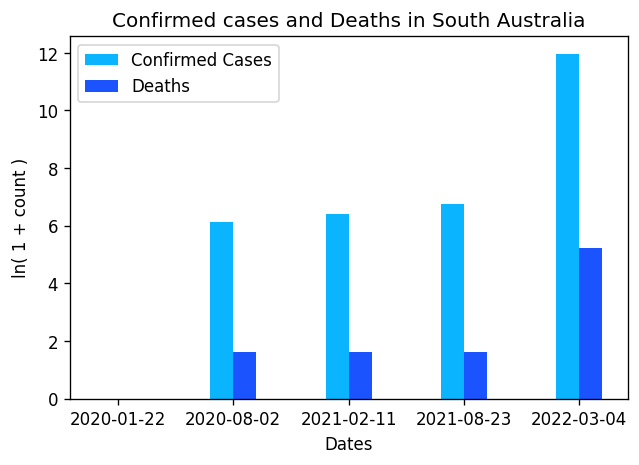

In [ ]:
#arrange the data
dfSouthaus = provincesofAus.loc[provincesofAus['Province/State'] ==  'South Australia']
dfSaus = dfSouthaus.groupby(by=['Date']).sum()
dfSaus

#make more tidy
first = pd.to_datetime(dfSaus.index[0])
last = pd.to_datetime(dfSaus.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistSaus= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistSaus
lendate = len(datelistSaus)

y = [ [dfSaus.loc[x].loc["Confirmed"], dfSaus.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in South Australia')
plt.bar(x1,conf,width,color='#0bb4ff',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#1a53ff',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistSaus)
plt.show()

On January 22, 2020, no confirmed cases and death cases were announced for this state either. Until August 23, 2021, the rates of "Confirmed Case" and "Death Cases" in this state were more or less similar to most states reviewed before this section. In addition, as a general belief observed in the Australian continent on March 4, 2022, an increase in the rate of confirmed cases and death cases is observed almost twice.

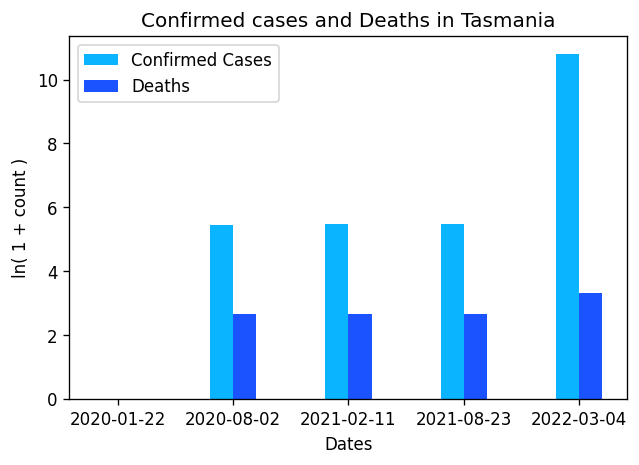

In [ ]:
#arrange the data
dfTasm = provincesofAus.loc[provincesofAus['Province/State'] == 'Tasmania' ]
dfTa = dfTasm.groupby(by=['Date']).sum()
dfTa

#make more tidy
first = pd.to_datetime(dfTa.index[0])
last = pd.to_datetime(dfTa.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistTa= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistTa
lendate = len(datelistTa)

y = [ [dfTa.loc[x].loc["Confirmed"], dfTa.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in Tasmania')
plt.bar(x1,conf,width,color='#0bb4ff',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#1a53ff',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistTa)
plt.show()

On January 22, 2020, no confirmed cases and death cases were announced for this state either. On August 2, 2020, February 11, 2021 and August 23, 2021, data on confirmed cases and death cases were announced at similar rates to the previous states. Confirmed case and death rates were shaped by about half on these dates. Finally, on March 4, 2022, confirmed cases doubled compared to the previous dates. However, contrary to this increase, the death rate remained stable in the same way. This seems to be a good example to show that death rates will not always increase at the same rate as confirmed cases.

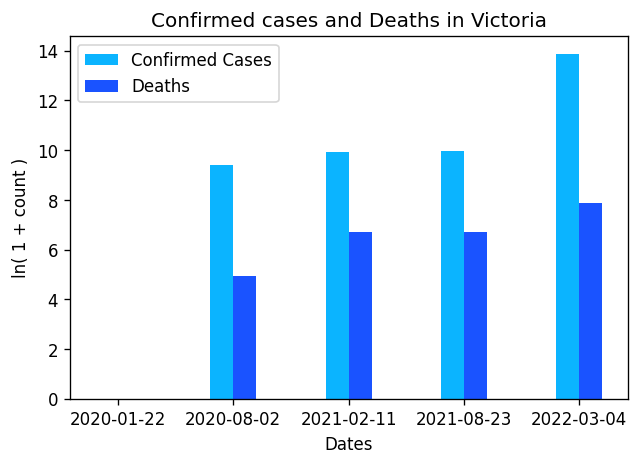

In [ ]:
#arrange the data
dfVictor = provincesofAus.loc[provincesofAus['Province/State'] == 'Victoria' ]
dfVic = dfVictor.groupby(by=['Date']).sum()
dfVic

#make more tidy
first = pd.to_datetime(dfVic.index[0])
last = pd.to_datetime(dfVic.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistVic= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistVic
lendate = len(datelistVic)

y = [[dfVic.loc[x].loc["Confirmed"], dfVic.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in Victoria')
plt.bar(x1,conf,width,color='#0bb4ff',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#1a53ff',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistVic)
plt.show()

On January 22, 2020, no confirmed cases and death cases were announced for this state either. "Confirmed Cases" and "Death Cases" in this state increased more unlike other states. This increase has been continuous and upwards. Mortality rates were higher than states with similar confirmed cases. Finally, on March 4, 2022, a half rate was determined between the confirmed case and the death rate.

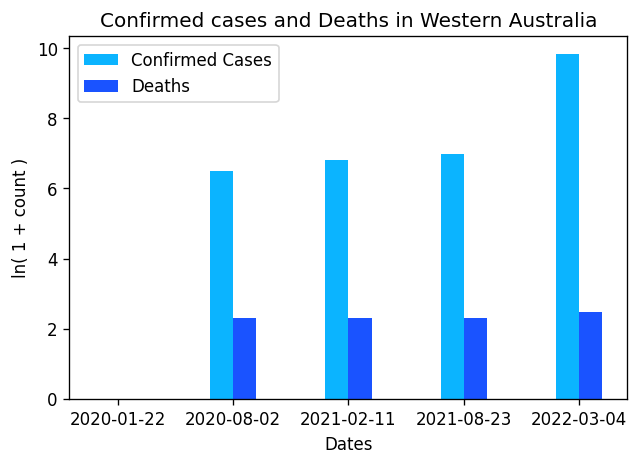

In [ ]:
#arrange the data
dfWesternaus = provincesofAus.loc[provincesofAus['Province/State'] == 'Western Australia' ]
dfWes = dfWesternaus.groupby(by=['Date']).sum()
dfWes

#make more tidy
first = pd.to_datetime(dfWes.index[0])
last = pd.to_datetime(dfWes.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistWes= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistWes
lendate = len(datelistWes)

y = [ [dfWes.loc[x].loc["Confirmed"], dfWes.loc[x].loc["Deaths"]] for x in X]

conf = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
dea = [math.log(x[1]+1) for x in y]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases and Deaths in Western Australia')
plt.bar(x1,conf,width,color='#0bb4ff',label='Confirmed Cases')
plt.bar(x2,dea,width,color='#1a53ff',label='Deaths')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistWes)
plt.show()

On January 22, 2020, no confirmed cases and death cases were announced for this state either. In this state, which is similar to all other states, when the dates are examined, it is seen that the death rates are much lower than the confirmed cases. Confirmed case data, on the other hand, is shaped in an average way according to this continent. The fact that death rates are so low shows us that there are beneficial situations in terms of development and technology.

### Countries of a WHO Region - Death and Confirmed Cases by Time

In this section, we will put forward the change of the number of deaths and confirmed cases in the countries/regions of Western Pacific

In [ ]:
countriesofwestern = df.loc[df['WHO Region'] == 'Western Pacific']
countriesofwestern

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
9,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
10,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific
11,Northern Territory,Australia,-12.463400,130.845600,2020-01-22,0,0,0,0,Western Pacific
12,Queensland,Australia,-27.469800,153.025100,2020-01-22,0,0,0,0,Western Pacific
13,South Australia,Australia,-34.928500,138.600700,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
214845,NaN,Solomon Islands,-9.645700,160.156200,2022-03-04,7326,111,0,7215,Western Pacific
214857,NaN,Taiwan*,23.700000,121.000000,2022-03-04,20717,853,0,19864,Western Pacific
214863,NaN,Tonga,-21.179000,-175.198200,2022-03-04,715,0,0,715,Western Pacific
214886,NaN,Vanuatu,-15.376700,166.959200,2022-03-04,18,1,0,17,Western Pacific


In [ ]:
countriesofwestern= df.loc[df['WHO Region'] == 'Western Pacific']['Country/Region'].unique().tolist()
countriesofwestern

['Australia',
 'Brunei',
 'Cambodia',
 'China',
 'Fiji',
 'Japan',
 'Kiribati',
 'South Korea',
 'Laos',
 'Malaysia',
 'Marshall Islands',
 'Micronesia',
 'Mongolia',
 'New Zealand',
 'Palau',
 'Papua New Guinea',
 'Philippines',
 'Samoa',
 'Singapore',
 'Solomon Islands',
 'Taiwan*',
 'Tonga',
 'Vanuatu',
 'Vietnam']

In the below code block, we prepared most of the data related to countries in the Western Pacific for using them in the line chart.

In [ ]:
countriesofwestern= df.loc[df['WHO Region'] == 'Western Pacific']
countriesofwestern #date and data

AusData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Australia' ]
AusData #dates and different provinces in Australia

datesanddataAus = AusData.groupby('Date').sum() 
datesanddataAus #dates and data with summation

#--------------------#
BruData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Brunei' ]
BruData #dates and different provinces in Brunei

datesanddataBru = BruData.groupby('Date').sum() 
datesanddataBru #date and data with summation

#--------------------#
CamData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Cambodia' ]
CamData #dates and differen provinces in Cambodia

datesanddataCam = CamData.groupby('Date').sum() 
datesanddataCam #date and data with summation

#--------------------#
ChiData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'China' ]
ChiData #dates and different provinces in country

datesanddataChi = ChiData.groupby('Date').sum()

#--------------------#
FijiData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Fiji' ]
FijiData #dates and different provinces in country

datesanddataFiji = FijiData.groupby('Date').sum()
datesanddataFiji 

#--------------------#
JapData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Japan' ]
JapData #dates and different provinces in country

datesanddataJap = JapData.groupby('Date').sum()
datesanddataJap

#--------------------#
KirData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Kiribati' ]
KirData #dates and different provinces in country

datesanddataKir = KirData.groupby('Date').sum()

#--------------------#
SouthkoreData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'South Korea' ]
SouthkoreData #dates and different provinces in country

datesanddataSkore = SouthkoreData.groupby('Date').sum()
datesanddataSkore

#--------------------#
LaosData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Laos' ]
LaosData #dates and different provinces in country

datesanddataLaos = LaosData.groupby('Date').sum()
datesanddataLaos

#--------------------#
MalayData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Malaysia' ]
MalayData #dates and different provinces in country

datesanddataMalay = MalayData.groupby('Date').sum()
datesanddataMalay

#--------------------#
MariData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Marshall Islands' ]
MariData #dates and different provinces in country

datesanddataMari = MariData.groupby('Date').sum()
datesanddataMari

#--------------------#
MicroData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Micronesia' ]
MicroData #dates and different provinces in country

datesanddataMicro = MicroData.groupby('Date').sum()
datesanddataMicro

#--------------------#
MongolData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Mongolia' ]
MongolData #dates and different provinces in country

datesanddataMongol = MongolData.groupby('Date').sum()
datesanddataMongol

#--------------------#
NezData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'New Zealand' ]
NezData #dates and different provinces in country

datesanddataNez = NezData.groupby('Date').sum()
datesanddataNez

#--------------------#
PalauData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Palau' ]
PalauData #dates and different provinces in country

datesanddataPalau = PalauData.groupby('Date').sum()
datesanddataPalau

#--------------------#
PapuaData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Papua New Guinea' ]
PapuaData #dates and different provinces in country

datesanddataPapua = PapuaData.groupby('Date').sum()
datesanddataPapua

#--------------------#
PhiData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Philippines' ]
PhiData #dates and different provinces in country

datesanddataPhi = PhiData.groupby('Date').sum()
datesanddataPhi

#--------------------#
SamData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Samoa' ]
SamData #dates and different provinces in country

datesanddataSam = SamData.groupby('Date').sum()
datesanddataSam

#--------------------#
SingData = countriesofwestern.loc[countriesofwestern['Country/Region'] == 'Singapore' ]
SingData #dates and different provinces in country

datesanddataSing = SingData.groupby('Date').sum()

Confirmed Cases in each Western Pacific country/region

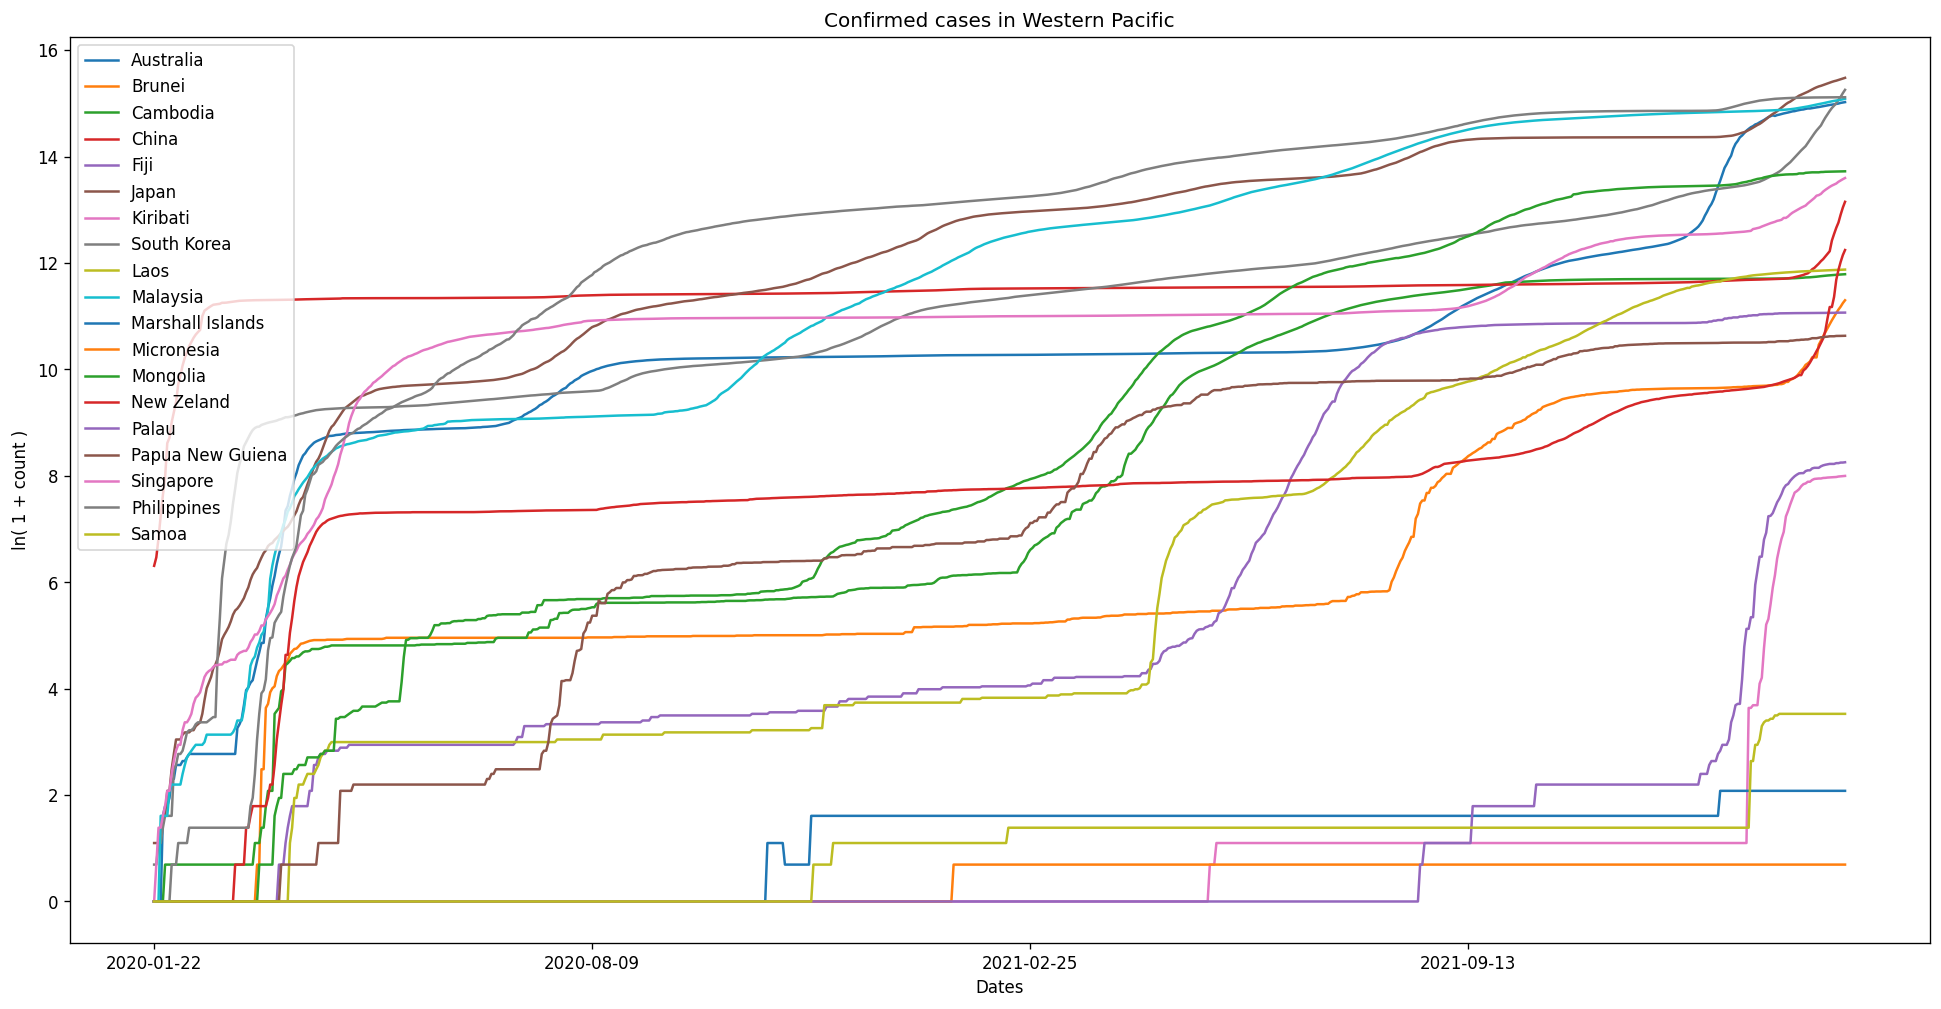

In [ ]:
#arrange the data
dfWesternaus = provincesofAus.loc[provincesofAus['Province/State'] == 'Western Australia' ]
dfWes = dfWesternaus.groupby(by=['Date']).sum()
dfWes

#make more tidy
first = pd.to_datetime(dfWes.index[0])
last = pd.to_datetime(dfWes.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistWes= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistWes
lendate = len(datelistWes)

y = [ [datesanddataAus.loc[x].loc["Confirmed"], datesanddataBru.loc[x].loc["Confirmed"], datesanddataCam.loc[x].loc["Confirmed"],datesanddataChi.loc[x].loc["Confirmed"]] for x in X]

# Australiaa = [math.log(x[0]+1) for x in y] # natural logarithm use math.log(x,10) for log base 10
# Bruneii = [math.log(x[1]+1) for x in y]
# Cambodiaa = [math.log(x[2]+1) for x in y]
# Chinaa = [math.log(x[3]+1) for x in y]
width = 0.2
# x1 = [i-3*width/2 for i in range(1,6)]
# x2 = [i-width/2 for i in range(1,6)]
# x3 = [i+width/2 for i in range(1,6)]
# x4 = [i+3*width/2 for i in range(1,6)]

plt.figure(dpi=120,figsize=(20,10))
plt.title('Confirmed cases in Western Pacific')
# plt.bar(x1,Australiaa,width,color='#0bb4ff',label='Australia')
# plt.bar(x2,Bruneii,width,color='#1a53ff',label='Brunei')
# plt.bar(x3,Cambodiaa,width,color='g',label='Cambodia')
# plt.bar(x4,Chinaa,width,color='r',label='China')

plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataAus['Confirmed']],color=None,label='Australia')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataBru['Confirmed']],color=None,label='Brunei')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataCam['Confirmed']],color=None,label='Cambodia')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataChi['Confirmed']],color=None,label='China')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataFiji['Confirmed']],color=None,label='Fiji')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataJap['Confirmed']],color=None,label='Japan')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataKir['Confirmed']],label='Kiribati')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataSkore['Confirmed']],label='South Korea')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataLaos['Confirmed']],label='Laos')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataMalay['Confirmed']],label='Malaysia')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataMari['Confirmed']],label='Marshall Islands')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataMicro['Confirmed']],label='Micronesia')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataMongol['Confirmed']],label='Mongolia')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataNez['Confirmed']],label='New Zeland')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataPalau['Confirmed']],label='Palau')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataPapua['Confirmed']],label='Papua New Guiena')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataSing['Confirmed']],label='Singapore')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataPhi['Confirmed']],label='Philippines')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataSam['Confirmed']],label='Samoa')

plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(0,len(datesanddataBru),200),datesanddataBru.index[::200])
plt.show()

In this part of the project, "Line Chart" was drawn by using the data that each country has separately. Both "Confirmed Cases" and "Death Cases" are pictured on these line charts.

Deaths in each Western Pacific country/region

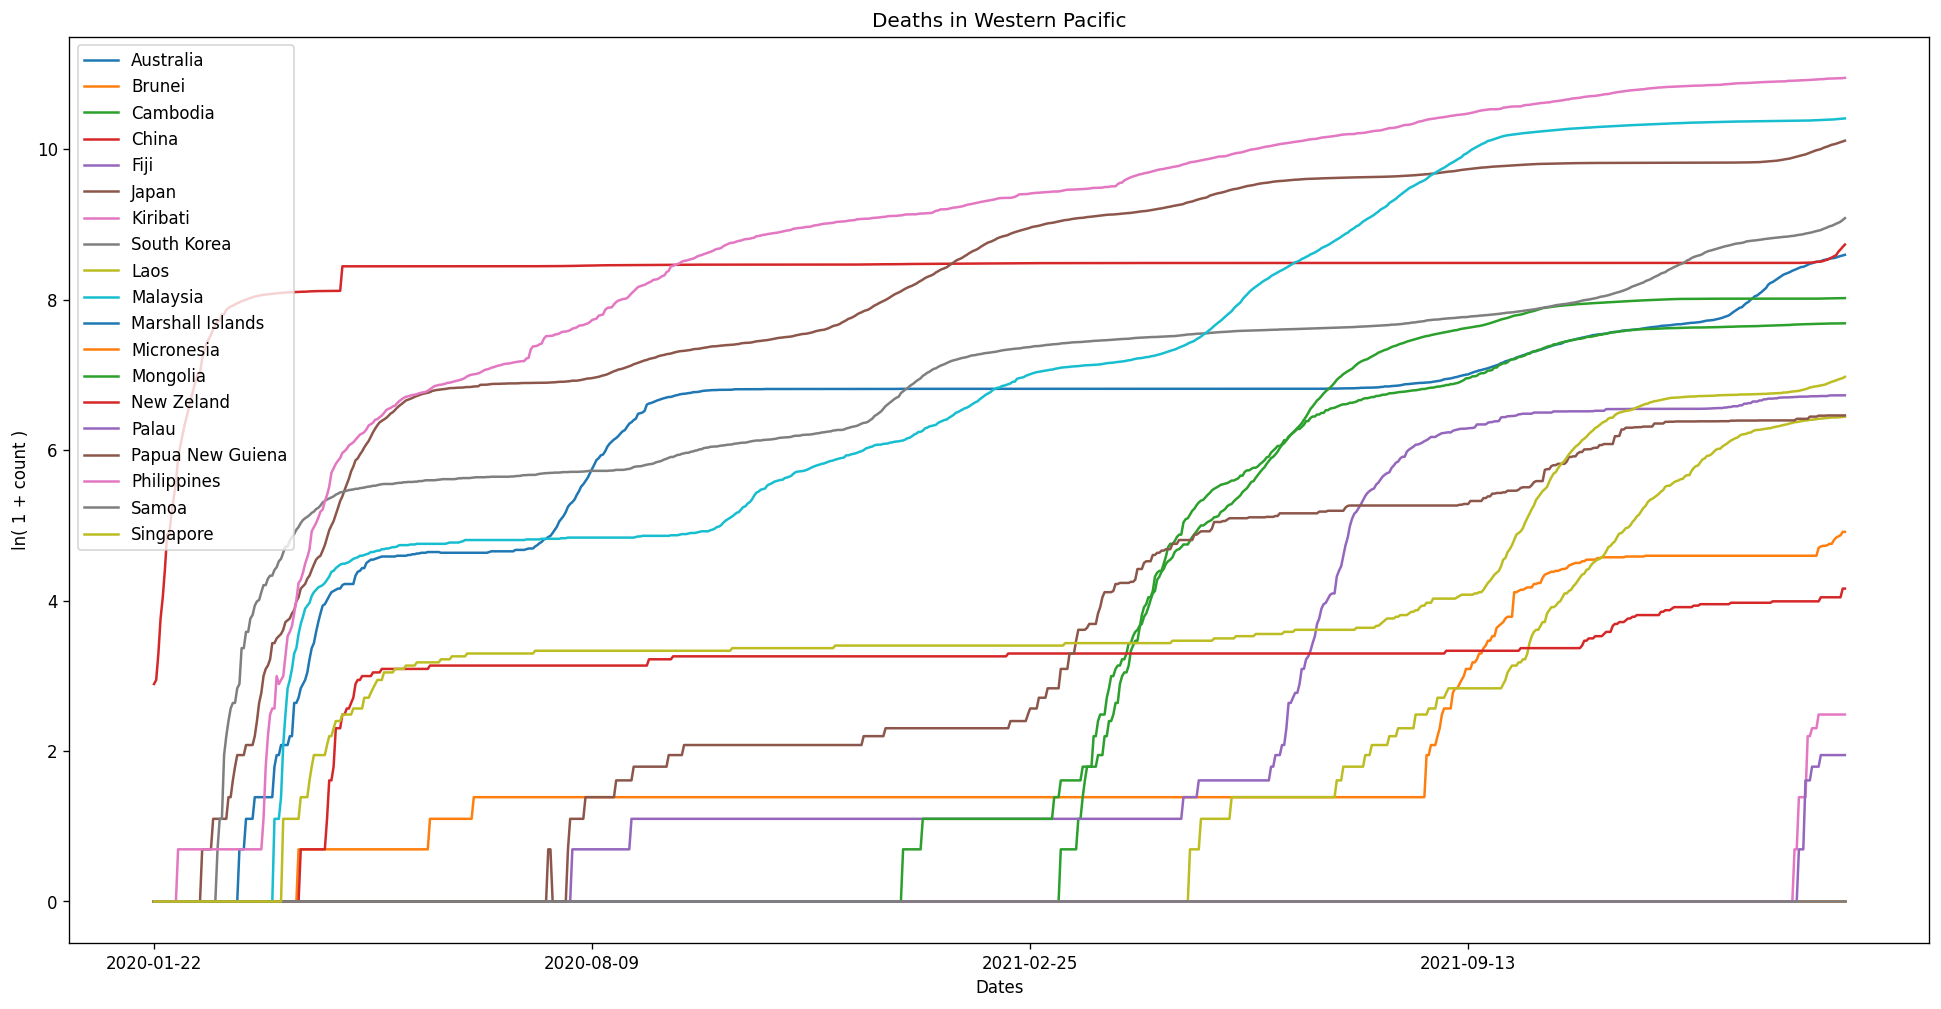

In [ ]:
#arrange the data
dfWesternaus = provincesofAus.loc[provincesofAus['Province/State'] == 'Western Australia' ]
dfWes = dfWesternaus.groupby(by=['Date']).sum()
dfWes

#make more tidy
first = pd.to_datetime(dfWes.index[0])
last = pd.to_datetime(dfWes.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistWes= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
#X = datelistWes
#lendate = len(datelistWes)
#y = [ [datesanddataAus.loc[x].loc["Confirmed"], datesanddataBru.loc[x].loc["Confirmed"], datesanddataCam.loc[x].loc["Confirmed"],datesanddataChi.loc[x].loc["Confirmed"]] for x in X]

plt.figure(dpi=120,figsize=(20,10))
plt.title('Deaths in Western Pacific')

plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataAus['Deaths']],color=None,label='Australia')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataBru['Deaths']],color=None,label='Brunei')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataCam['Deaths']],color=None,label='Cambodia')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataChi['Deaths']],color=None,label='China')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataFiji['Deaths']],color=None,label='Fiji')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataJap['Deaths']],color=None,label='Japan')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataKir['Deaths']],label='Kiribati')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataSkore['Deaths']],label='South Korea')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataLaos['Deaths']],label='Laos')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataMalay['Deaths']],label='Malaysia')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataMari['Deaths']],label='Marshall Islands')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataMicro['Deaths']],label='Micronesia')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataMongol['Deaths']],label='Mongolia')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataNez['Deaths']],label='New Zeland')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataPalau['Deaths']],label='Palau')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataPapua['Deaths']],label='Papua New Guiena')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataPhi['Deaths']],label='Philippines')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataSam['Deaths']],label='Samoa')
plt.plot(range(0,len(datesanddataBru)),[math.log(x+1) for x in datesanddataSing['Deaths']],label='Singapore')

plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(0,len(datesanddataBru),200),datesanddataBru.index[::200])
plt.show()

### Geographically nearby countries/regions comparison

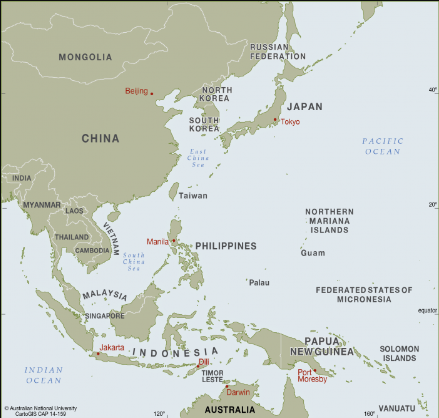

Two close countries that are geographically close to each other will be examined in this section. "China" and "Mongolia" were chosen to make this comparison. Confirmed cases and death cases on these two countries will be conveyed to you via bar charts.

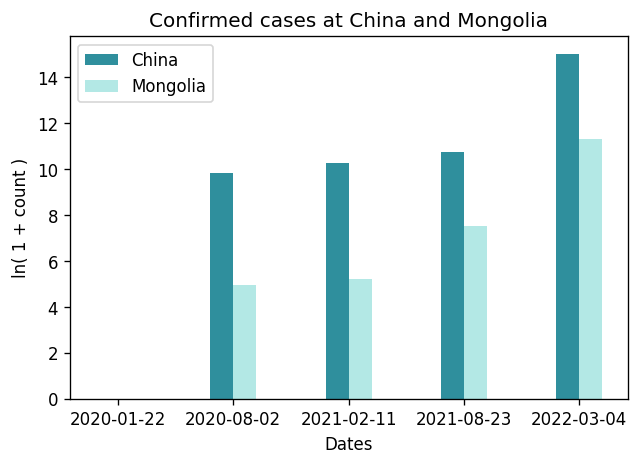

In [ ]:
#arrange the data
dfWesternaus = provincesofAus.loc[provincesofAus['Province/State'] == 'Western Australia' ]
dfWes = dfWesternaus.groupby(by=['Date']).sum()
dfWes

#make more tidy
first = pd.to_datetime(dfWes.index[0])
last = pd.to_datetime(dfWes.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistWes= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistWes
lendate = len(datelistWes)

Chinaa = [math.log(x[0]+1) for x in y]  # natural logarithm use math.log(x,10) for log base 10
Mongoliaa = [math.log(x[1]+1) for x in y]
y = [[datesanddataChi.loc[x].loc["Confirmed"], datesanddataMongol.loc[x].loc["Confirmed"]] for x in X]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Confirmed cases at China and Mongolia')
plt.bar(x1,Chinaa,width,color='#2F8F9D',label='China')
plt.bar(x2,Mongoliaa,width,color='#B3E8E5',label='Mongolia')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistWes)
plt.show()

Looking at January 22, 2020, it is seen that no "Confirmed Case" data has been announced for China and Mongolia. On August 2, 2020, it is seen that the confirmed case data of China is positioned to be almost twice that of Mongolia. On February 11, 2021, it is seen that this rate is almost the same. Likewise, on August 23, 2021, it is seen that this rate increased, but not too much for China. The change experienced in Mongolia has been more than in China. Finally, with the increase in China on March 4, 2022, the increase in Mongolia was also noticeable. Contrary to other dates, Mongolia got closer to China proportionally.

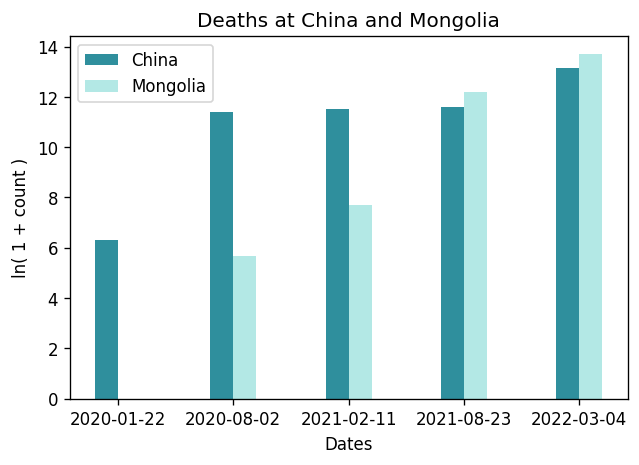

In [ ]:
#arrange the data
dfWesternaus = provincesofAus.loc[provincesofAus['Province/State'] == 'Western Australia' ]
dfWes = dfWesternaus.groupby(by=['Date']).sum()
dfWes

#make more tidy
first = pd.to_datetime(dfWes.index[0])
last = pd.to_datetime(dfWes.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistWes= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistWes
lendate = len(datelistWes)

Chinaa = [math.log(x[0]+1) for x in y]  # natural logarithm use math.log(x,10) for log base 10
Mongoliaa = [math.log(x[1]+1) for x in y]
y = [[datesanddataChi.loc[x].loc["Deaths"], datesanddataMongol.loc[x].loc["Deaths"]] for x in X]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Deaths at China and Mongolia')
plt.bar(x1,Chinaa,width,color='#2F8F9D',label='China')
plt.bar(x2,Mongoliaa,width,color='#B3E8E5',label='Mongolia')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistWes)
plt.show()

On January 22, 2020, death data were announced in China, the origin of the disease, although no confirmed case has been announced yet. He accompanied China on August 2, 2020 in Mongolia. The increase in China has almost doubled and a similar increase is observed in Mongolia. On February 11, 2021, the death rates in both countries increased and the rate is constantly increasing. On August 23, 2021, mortality rates in Mongolia exceeded those in China. This rate continued on March 4, 2022 in the same way. Mortality rates in the disease have reached the highest point towards recent times.

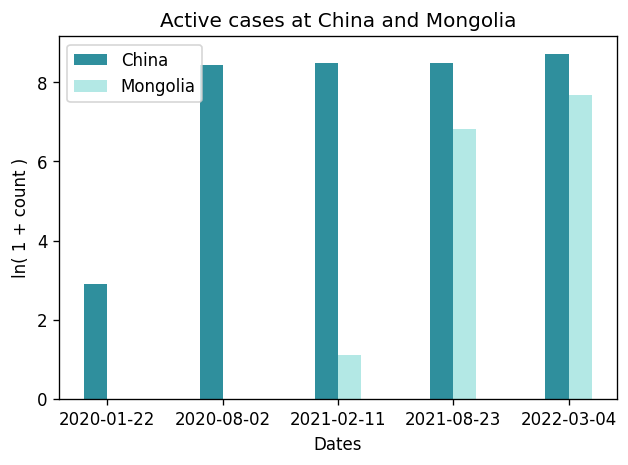

In [ ]:
#arrange the data
dfWesternaus = provincesofAus.loc[provincesofAus['Province/State'] == 'Western Australia' ]
dfWes = dfWesternaus.groupby(by=['Date']).sum()
dfWes

#make more tidy
first = pd.to_datetime(dfWes.index[0])
last = pd.to_datetime(dfWes.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistWes= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistWes
lendate = len(datelistWes)

Chinaa = [math.log(x[0]+1) for x in y]  # natural logarithm use math.log(x,10) for log base 10
Mongoliaa = [math.log(x[1]+1) for x in y]
y = [[datesanddataChi.loc[x].loc["Active"], datesanddataMongol.loc[x].loc["Active"]] for x in X]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Active cases at China and Mongolia')
plt.bar(x1,Chinaa,width,color='#2F8F9D',label='China')
plt.bar(x2,Mongoliaa,width,color='#B3E8E5',label='Mongolia')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistWes)
plt.show()

Although there are "Active Cases" data in China on January 22, 2020, no active case has been found in Mongolia yet. On August 2, 2020, the active cases in China almost quadrupled, but on the contrary, there are no active cases in Mongolia. On February 11, 2021, the number of active cases in China continued at the same rate. At this date, the active case rates in Mongolia began to be reflected in the table. On August 23, 2021, there was a huge increase in active cases in Mongolia compared to the previous date. The active case in China continues at the same rate. Finally, on March 4, 2022, the number of active cases in Mongolia continued to increase. At the same time, this rate continued to rise in China, although not very rapidly.

### Developed and least developed WHO Region comparison
Africa&Europe

In [ ]:
countriesofAfrica= df.loc[df['WHO Region'] == 'Africa']
countriesofAfrica #date and data

datesanddataAfrica = countriesofAfrica.groupby('Date').sum() 
datesanddataAfrica

#--------------------#

countriesofEurope= df.loc[df['WHO Region'] == 'Europe']
countriesofEurope #date and data

datesanddataEurope = countriesofEurope.groupby('Date').sum() 
datesanddataEurope

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,3105.572904,366.405899,0,0,0,0
2020-01-23,3105.572904,366.405899,0,0,0,0
2020-01-24,3105.572904,366.405899,2,0,0,2
2020-01-25,3105.572904,366.405899,3,0,0,3
2020-01-26,3105.572904,366.405899,3,0,0,3
...,...,...,...,...,...,...
2022-02-28,3105.572904,366.405899,180318054,1875485,0,178442569
2022-03-01,3105.572904,366.405899,181105995,1879027,0,179226968
2022-03-02,3105.572904,366.405899,181913298,1882162,0,180031136


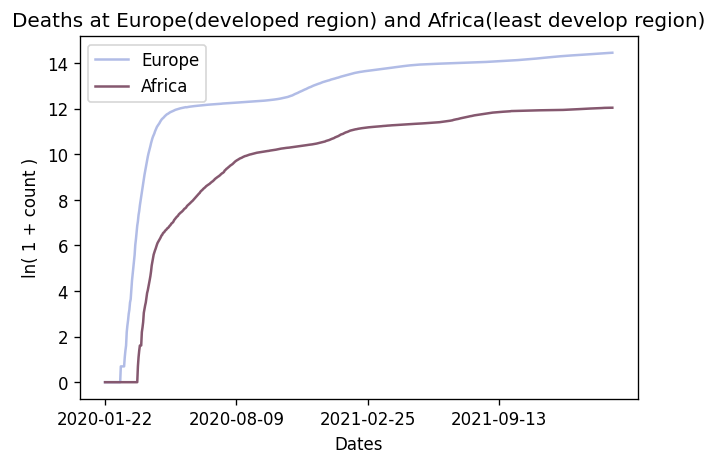

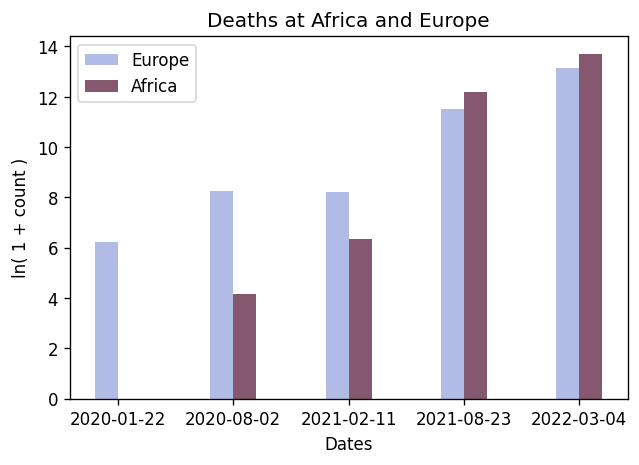

In [ ]:
#arrange the data
dfWesternaus = provincesofAus.loc[provincesofAus['Province/State'] == 'Western Australia' ]
dfWes = dfWesternaus.groupby(by=['Date']).sum()
dfWes

#make more tidy
first = pd.to_datetime(dfWes.index[0])
last = pd.to_datetime(dfWes.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistWes= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot

plt.figure(dpi=120)
plt.title('Deaths at Europe(developed region) and Africa(least develop region)')

plt.plot(range(0,len(datesanddataEurope)),[math.log(x+1) for x in datesanddataEurope['Deaths']],color='#B1BCE6',label='Europe')
plt.plot(range(0,len(datesanddataAfrica)),[math.log(x+1) for x in datesanddataAfrica['Deaths']],color='#85586F',label='Africa')

plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(0,len(datesanddataBru),200),datesanddataBru.index[::200])
plt.show()

#--------------------#

#arrange the data
dfWesternaus = provincesofAus.loc[provincesofAus['Province/State'] == 'Western Australia' ]
dfWes = dfWesternaus.groupby(by=['Date']).sum()
dfWes

#make more tidy
first = pd.to_datetime(dfWes.index[0])
last = pd.to_datetime(dfWes.index[-1])
diff = (last-first).days
delt = diff//4
#print(f'first date is {first.date()}, last date is {last.date()}\ndays passed {diff}\n')

datelistWes= [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]

#plot
X = datelistWes
lendate = len(datelistWes)

Chinaa = [math.log(x[0]+1) for x in y]  # natural logarithm use math.log(x,10) for log base 10
Mongoliaa = [math.log(x[1]+1) for x in y]
y = [[datesanddataEurope.loc[x].loc["Deaths"], datesanddataAfrica.loc[x].loc["Deaths"]] for x in X]

width = 0.2
x1 = [i-width/2 for i in range(1,6)]
x2 = [i+width/2 for i in range(1,6)]

plt.figure(dpi=120)
plt.title('Deaths at Africa and Europe')
plt.bar(x1,Chinaa,width,color='#B1BCE6',label='Europe')
plt.bar(x2,Mongoliaa,width,color='#85586F',label='Africa')
plt.legend()
plt.ylabel('ln( 1 + count )')
plt.xlabel('Dates')
plt.xticks(range(1,6),datelistWes)
plt.show()

Both "Line Chart" and "Bar Chart" are used to compare the mortality rates of these two regions. First of all, although no "Death Case" data was found in Africa on January 22, 2020, a certain level of mortality was announced in Europe. Then, on August 2, 2020, the death data in Africa increased slightly closer to Europe. Meanwhile, death rates in Europe showed a certain increase, if not excessive, compared to the previous date. On February 11, 2021, decreases were observed in the mortality data in Europe, but the increase in Africa continues, unlike Europe. On August 23, 2021, there was a great increase in both Africa and Europe. While the mortality rate in Europe has increased proportionally 1.5 times, the rate in Africa has doubled. In addition, on this date, the death rate in Africa was higher than in Europe, unlike previous dates. On the next date, March 4, 2022, these rates continued with a slight increase without major changes. Africa's superiority in mortality rate continued in this date as well.

### Adding new features
***New cases***

In [ ]:
print(df2.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


There is no null date in our second dataset (named: "country_wise_latest.csv")

In [ ]:
df2

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [ ]:
df2ncaseslist = []
for x in df2['Country/Region']:
  df2ncaseslist.append(x)
df2ncaseslist = set(df2ncaseslist)
df2ncaseslist

df2ncasesdata = []
for x in df2['New cases']:
  df2ncasesdata.append(x)
df2ncasesdata

print (len(df2ncaseslist))
print (len(df2ncasesdata))

res = {}
for key in df2ncaseslist:
  for value in df2ncasesdata:
    res[key] = value
    df2ncasesdata.remove(value)
    break  
res

187
187


{'Afghanistan': 10,
 'Albania': 0,
 'Algeria': 1104,
 'Andorra': 14,
 'Angola': 104,
 'Antigua and Barbuda': 40,
 'Argentina': 616,
 'Armenia': 0,
 'Australia': 13756,
 'Austria': 0,
 'Azerbaijan': 0,
 'Bahamas': 0,
 'Bahrain': 0,
 'Bangladesh': 7,
 'Barbados': 0,
 'Belarus': 10,
 'Belgium': 194,
 'Belize': 0,
 'Benin': 32,
 'Bhutan': 120,
 'Bolivia': 2,
 'Bosnia and Herzegovina': 18,
 'Botswana': 11,
 'Brazil': 483,
 'Brunei': 1,
 'Bulgaria': 25,
 'Burkina Faso': 23284,
 'Burma': 43,
 'Burundi': 67,
 'Cabo Verde': 47,
 'Cambodia': 0,
 'Cameroon': 109,
 'Canada': 445,
 'Central African Republic': 594,
 'Chad': 10,
 'Chile': 2133,
 'China': 411,
 'Colombia': 351,
 'Comoros': 0,
 'Congo (Brazzaville)': 205,
 'Congo (Kinshasa)': 0,
 'Costa Rica': 5607,
 "Cote d'Ivoire": 0,
 'Croatia': 467,
 'Cuba': 158,
 'Cyprus': 0,
 'Czechia': 13,
 'Denmark': 117,
 'Djibouti': 688,
 'Dominica': 3,
 'Dominican Republic': 0,
 'Ecuador': 83,
 'Egypt': 168,
 'El Salvador': 648,
 'Equatorial Guinea': 15,
 'E

## Hypothesis Testing

#### Hypothesis Number: 1
H0 (Null Hypothesis): Geographical location does not have any effect on the confirmed and death counts of countries/regions throughout the time period

HA (Alternative Hypothesis): Geographical location has an effect on the confirmed and death counts of countries/regions throughout the time period

In this hypothesis, we worked on two different WHO regions Americas and Africas to see whether there is a relationship between geographical location or not!

In [ ]:
dfAfrica = df.loc[df['WHO Region'] == 'Africa']
dfAf = dfafrica.groupby(by=['Date']).sum()

dfAmericas = df.loc[df['WHO Region'] == 'Americas']
dfAmer = dfAmericas.groupby(by=['Date']).sum()

In [ ]:
confirmed_meanAf = dfAf['Confirmed'].mean()
confirmed_meanAmer = dfAmer['Confirmed'].mean()

confirmed_stdAf = dfAf['Confirmed'].std()
confirmed_stdAmer = dfAmer['Confirmed'].std()
print("Mean of the confirmed case count in AFRICA within the time period: ", confirmed_meanAf)
print("Mean of the confirmed case count in AMERICAS within the time period: ",confirmed_meanAmer)
print("Standard Deviation of the confirmed case count in AFRICA within the time period: ",confirmed_stdAf)
print("Standard Deviation of the confirmed case count in AMERICAS within the time period: ",confirmed_stdAmer)

Mean of the confirmed case count in AFRICA within the time period:  2992004.8421733505
Mean of the confirmed case count in AMERICAS within the time period:  49656474.086675294
Standard Deviation of the confirmed case count in AFRICA within the time period:  2546787.961492143
Standard Deviation of the confirmed case count in AMERICAS within the time period:  41555077.41540914


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

dfpartAf = dfAfrica['Confirmed'].reset_index().drop(['index'], axis=1)
dfpartUS = dfAmericas['Confirmed'].reset_index().drop(['index'], axis=1)

dfpartAfList = dfpartAf['Confirmed'].tolist()
dfpartUSList = dfpartUS['Confirmed'].tolist()

test = ztest(dfpartAfList, dfpartUSList, value=10)
t_statistic = test[0]
p_value = test[1]
print("For confirmed cases;")
print("Test statistic for the hypothesis testing is", t_statistic, "\np-Value is", p_value)

For confirmed cases;
Test statistic for the hypothesis testing is -35.571492757101986 
p-Value is 3.866685263774468e-277


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
deaths_meanAf = dfAf['Deaths'].mean()
deaths_meanAmer = dfAmer['Deaths'].mean()

deaths_stdAf = dfAf['Deaths'].std()
deaths_stdAmer = dfAmer['Deaths'].std()
print("Mean of the death count in AFRICA within the time period: ", deaths_meanAf)
print("Mean of the death count in AMERICAS within the time period: ",deaths_meanAmer)
print("Standard Deviation of the death count in AFRICA within the time period: ",deaths_stdAf)
print("Standard Deviation of the death count in AMERICAS within the time period: ",deaths_stdAmer)

Mean of the death count in AFRICA within the time period:  69929.40620957309
Mean of the death count in AMERICAS within the time period:  1227911.172056921
Standard Deviation of the death count in AFRICA within the time period:  58489.63228987449
Standard Deviation of the death count in AMERICAS within the time period:  879836.415616016


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

dfpartAf = dfAfrica['Deaths'].reset_index().drop(['index'], axis=1)
dfpartUS = dfAmericas['Deaths'].reset_index().drop(['index'], axis=1)

dfpartAfList = dfpartAf['Deaths'].tolist()
dfpartUSList = dfpartUS['Deaths'].tolist()

test = ztest(dfpartAfList, dfpartUSList, value=10)
t_statistic = test[0]
p_value = test[1]
print("For deaths;")
print("Test statistic for the hypothesis testing is", t_statistic, "\np-Value is", p_value)

For deaths;
Test statistic for the hypothesis testing is -47.319190634376696 
p-Value is 0.0


**We rejected the null hypothesis because p-values for both death cases and confirmed cases are less than the significant level (alpha=0.05). Therefore, one can say that Geographical location has an effect on the confirmed and death counts of countries/regions throughout the time period**

### Hypothesis Number: 2
H0 (Null Hypothesis): Geographically nearby countries does not share similar trends regarding confirmed and death counts

HA (Alternative Hypothesis): Geographically nearby countries shares similar trends regarding confirmed and death counts

In this hypothesis, we worked on two geographically close countries Venezuela and Brazil to see whether they share similar trends or not

In [ ]:
countries = df[df['WHO Region']=='Americas']['Country/Region'].unique().tolist()
dfAmer = df.groupby(by=['WHO Region','Country/Region']).sum().loc['Americas']
dfAmer

,Lat,Long,Confirmed,Deaths,Recovered,Active
Country/Region,,,,,,
Antigua and Barbuda,13187.998400,-47768.617200,1112246,27520,191813,892913
Argentina,-29695.645300,-49175.709100,2088265538,43144593,711610324,1333510621
Bahamas,19345.009105,-60321.742197,8104902,193231,2484156,5427515
Barbados,10198.884700,-46026.893600,5742800,47999,692334,5002467
Belize,13287.792700,-68408.644800,9903486,188515,2947228,6767743
Bolivia,-12592.324600,-49154.065100,218552731,8216753,69896258,140439720
Brazil,-11003.655000,-40138.256900,8712316058,236486341,3412350387,5063479330
Canada,547945.378800,-929608.176700,728001085,14099685,0,713901400
Chile,-27576.852300,-55302.739000,734805918,16052688,316380403,402372827


In [ ]:
dfVnz = df.loc[df['Country/Region'] == 'Venezuela']
dfVenez = dfVnz.groupby(by=['Date']).sum()

dfCol = df.loc[df['Country/Region'] == 'Colombia']
dfColom = dfCol.groupby(by=['Date']).sum()

In [ ]:
confirmed_meanVenez = dfVenez['Confirmed'].mean()
confirmed_meanCol = dfColom['Confirmed'].mean()

confirmed_stdVenez = dfVenez['Confirmed'].std()
confirmed_stdCol = dfColom['Confirmed'].std()
print("Mean of the confirmed case count in VENEZUELA within the time period: ", confirmed_meanVenez)
print("Mean of the confirmed case count in COLOMBIA within the time period: ",confirmed_meanCol)
print("Standard Deviation of the confirmed case count in VENEZUELA within the time period: ",confirmed_stdVenez)
print("Standard Deviation of the confirmed case count in COLOMBIA within the time period: ",confirmed_stdCol)

Mean of the confirmed case count in VENEZUELA within the time period:  184018.99223803362
Mean of the confirmed case count in COLOMBIA within the time period:  2465071.0388098317
Standard Deviation of the confirmed case count in VENEZUELA within the time period:  165222.85457681966
Standard Deviation of the confirmed case count in COLOMBIA within the time period:  2094925.7165408183


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

dfpartVenez = dfVnz['Confirmed'].reset_index().drop(['index'], axis=1)
dfpartCol = dfCol['Confirmed'].reset_index().drop(['index'], axis=1)

dfpartVenezList = dfpartVenez['Confirmed'].tolist()
dfpartColList = dfpartCol['Confirmed'].tolist()

test = ztest(dfpartVenezList, dfpartColList, value=0)
t_statistic = test[0]
p_value = test[1]
print("For confirmed cases;")
print("Test statistic for the hypothesis testing is", t_statistic, "\np-Value is", p_value)

For confirmed cases;
Test statistic for the hypothesis testing is -30.17934445765565 
p-Value is 4.421852032547436e-200


In [ ]:
death_meanVenez = dfVenez['Deaths'].mean()
death_meanCol = dfColom['Deaths'].mean()

death_stdVenez = dfVenez['Deaths'].std()
death_stdCol = dfColom['Deaths'].std()
print("Mean of the death case count in VENEZUELA within the time period: ", death_meanVenez)
print("Mean of the death case in COLOMBIA within the time period: ",death_meanCol)
print("Standard Deviation of the death case count in VENEZUELA within the time period: ",death_stdVenez)
print("Standard Deviation of the death case count in COLOMBIA within the time period: ",death_stdCol)

Mean of the death case count in VENEZUELA within the time period:  2060.0297542043986
Mean of the death case in COLOMBIA within the time period:  62720.1617076326
Standard Deviation of the death case count in VENEZUELA within the time period:  1975.2176814239772
Standard Deviation of the death case count in COLOMBIA within the time period:  51005.67263695961


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

dfpartVenez = dfVnz['Deaths'].reset_index().drop(['index'], axis=1)
dfpartColom = dfCol['Deaths'].reset_index().drop(['index'], axis=1)

dfpartVenezList = dfpartVenez['Deaths'].tolist()
dfpartColomList = dfpartColom['Deaths'].tolist()

test = ztest(dfpartVenezList, dfpartColomList, value=0)
t_statistic = test[0]
p_value = test[1]
print("For deaths;")
print("Test statistic for the hypothesis testing is", t_statistic, "\np-Value is", p_value)

For deaths;
Test statistic for the hypothesis testing is -33.040698138694815 
p-Value is 2.1159949420233794e-239


**We rejected the null hypothesis because p-values for both death cases and confirmed cases are less than the significant level (alpha=0.05). Therefore, one can say that geographically nearby countries shares similar trends regarding confirmed and death counts**



### Hypothesis Number: 3
H0 (Null Hypothesis): There are NOT significant differences exist between developed and least developed countries/regions regarding confirmed, death and active counts

HA (Alternative Hypothesis): There are significant differences exist between developed and least developed countries/regions regarding confirmed, death and active counts

In this hypothesis, we chose and worked on two opposite countries in terms of their development level: Singapore vs. Afghanistan

In [ ]:
dfSing = df.loc[df['Country/Region'] == 'Singapore']
dfSin = dfSing.groupby(by=['Date']).sum()

dfAfghan = df.loc[df['Country/Region'] == 'Afghanistan']
dfAfg = dfCol.groupby(by=['Date']).sum()

In [ ]:
confirmed_meanSin = dfSin['Confirmed'].mean()
confirmed_meanAfg = dfAfg['Confirmed'].mean()

confirmed_stdSin = dfSin['Confirmed'].std()
confirmed_stdAfg = dfAfg['Confirmed'].std()
print("Mean of the confirmed case count in SINGAPORE within the time period: ", confirmed_meanSin)
print("Mean of the confirmed case count in AFGHANISTAN within the time period: ",confirmed_meanAfg)
print("Standard Deviation of the confirmed case count in SINGAPORE within the time period: ",confirmed_stdSin)
print("Standard Deviation of the confirmed case count in AFGHANISTAN within the time period: ",confirmed_stdAfg)

Mean of the confirmed case count in SINGAPORE within the time period:  99379.9702457956
Mean of the confirmed case count in AFGHANISTAN within the time period:  2465071.0388098317
Standard Deviation of the confirmed case count in SINGAPORE within the time period:  123984.27018341848
Standard Deviation of the confirmed case count in AFGHANISTAN within the time period:  2094925.7165408183


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

dfpartSin = dfSing['Confirmed'].reset_index().drop(['index'], axis=1)
dfpartAfg = dfAfghan['Confirmed'].reset_index().drop(['index'], axis=1)

dfpartSinList = dfpartSin['Confirmed'].tolist()
dfpartAfgList = dfpartAfg['Confirmed'].tolist()

test = ztest(dfpartSinList, dfpartAfgList, value=0)
t_statistic = test[0]
p_value = test[1]
print("For confirmed cases;")
print("Test statistic for the hypothesis testing is", t_statistic, "\np-Value is", p_value)

For confirmed cases;
Test statistic for the hypothesis testing is 4.82270827016691 
p-Value is 1.4162202934739763e-06


In [ ]:
death_meanSin = dfSin['Deaths'].mean()
death_meanAfg = dfAfg['Deaths'].mean()

death_stdSin = dfSin['Deaths'].std()
death_stdAfg = dfAfg['Deaths'].std()
print("Mean of the death case count in SINGAPORE within the time period: ", death_meanSin)
print("Mean of the death case count in AFGHANISTAN within the time period: ",death_meanAfg)
print("Standard Deviation of the death case count in SINGAPORE within the time period: ",death_stdSin)
print("Standard Deviation of the death case count in AFGHANISTAN within the time period: ",death_stdAfg)

Mean of the death case count in SINGAPORE within the time period:  158.29366106080207
Mean of the death case count in AFGHANISTAN within the time period:  62720.1617076326
Standard Deviation of the death case count in SINGAPORE within the time period:  286.8515673350308
Standard Deviation of the death case count in AFGHANISTAN within the time period:  51005.67263695961


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

dfpartSin = dfSing['Deaths'].reset_index().drop(['index'], axis=1)
dfpartAfg = dfAfghan['Deaths'].reset_index().drop(['index'], axis=1)

dfpartSinList = dfpartSin['Deaths'].tolist()
dfpartAfgList = dfpartAfg['Deaths'].tolist()

test = ztest(dfpartSinList, dfpartAfgList, value=0)
t_statistic = test[0]
p_value = test[1]
print("For deaths;")
print("Test statistic for the hypothesis testing is", t_statistic, "\np-Value is", p_value)

For deaths;
Test statistic for the hypothesis testing is -31.070729670745674 
p-Value is 5.988421388679582e-212


## Machine Learning Models

### Linear Regression

In [ ]:
dfafrica = df.loc[df['WHO Region'] == 'Africa']
dfAf = dfafrica.groupby(by=['Date']).sum()
dfAf

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,0.930215,767.073219,0,0,0,0
2020-01-23,0.930215,767.073219,0,0,0,0
2020-01-24,0.930215,767.073219,0,0,0,0
2020-01-25,0.930215,767.073219,0,0,0,0
2020-01-26,0.930215,767.073219,0,0,0,0
...,...,...,...,...,...,...
2022-02-28,0.930215,767.073219,7995660,169153,0,7826507
2022-03-01,0.930215,767.073219,7998648,169178,0,7829470
2022-03-02,0.930215,767.073219,8001845,169224,0,7832621


In [ ]:
first = pd.to_datetime(dfAf.index[0])
last = pd.to_datetime(dfAf.index[-1])
diff = (last-first).days
delt = diff//4
print(f'The first date is {first.date()}, and the last date is {last.date()}\n-->Days passed {diff}\n')
datelistAf = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]
print(datelistAf)

The first date is 2020-01-22, and the last date is 2022-03-04
-->Days passed 772

['2020-01-22', '2020-08-02', '2021-02-11', '2021-08-23', '2022-03-04']


In [ ]:
deaths_africa = dfAf["Deaths"]
death_array = np.array([])
index_array = np.array([])
index_number = 0
for number in range(773):
  death_array = np.append(death_array,[deaths_africa.iloc[number]])
  index_array = np.append(index_array,[index_number])
  index_number +=1
print(death_array)
print(index_array)

[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 1.00000e+00 2.00000e+00 3.00000e+00 4.00000e+00
 4.00000e+00 4.00000e+00 8.00000e+00 1.00000e+01 1.30000e+01 2.00000e+01
 2.40000e+01 2.80000e+01 3.20000e+01 4.00000e+01 4.90000e+01 5.50000e+01
 6.40000e+01 7.60000e+01 8.80000e+01 1.04000e+02 1.28000e+02 1.66000e+02
 1.96000e+02 2.31000e+02 2.69000e+02 2.97000e+02 3.23000e+02 3.49000e+02
 3.83000e+02 4.18000e+02 4.51000e+02 4.74000e+02 5.

In [ ]:
def estimate_coef(x, y):
  # number of observations/points
  n = np.size(x)
  # mean of x and y vector
  m_x = np.mean(x)    
  m_y = np.mean(y)
  
  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x
  
  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x
  
  return (b_0, b_1)
  
def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "r", marker = "o", s = 30)
  
  # predicted response vector
  y_pred = b[0] + b[1]*x
  
  # plotting the regression line
  plt.plot(x, y_pred, color = "g")
  
  # putting labels
  plt.xlabel('x')
  plt.ylabel('y')
  
  plt.show()

Estimated coefficients:
b_0 = -29374.627004422524 
b_1 = 257.26433475128397




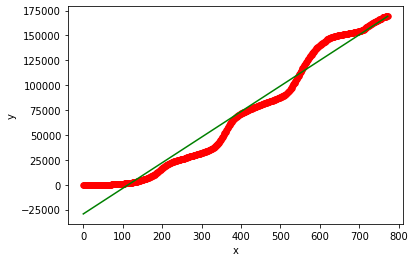

In [ ]:
# observations / data
x = index_array
y = death_array

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
print("\n")
# plotting regression line
plot_regression_line(x, y, b)

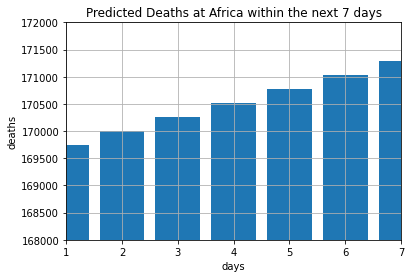

In [ ]:
pred_array = np.array([])
mat_array = np.array([])
day = 1
for days in range(7):
  pred_array = np.append(pred_array, [b[0]+b[1]*(773+day)])
  mat_array = np.append(mat_array,[day])
  day += 1

fig ,ax = plt.subplots()

plt.bar(mat_array,pred_array)
ax.set(xlabel ='days', ylabel ='deaths',xlim =(1, 7), ylim =(168000, 172000), title ='Predicted Deaths at Africa within the next 7 days')
ax.grid()
plt.show()

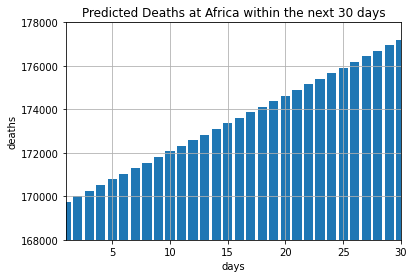

In [ ]:
pred_array = np.array([])
mat_array = np.array([])
day = 1
for days in range(30):
  pred_array = np.append(pred_array, [b[0]+b[1]*(773+day)])
  mat_array = np.append(mat_array,[day])
  day += 1

fig ,ax = plt.subplots()

plt.bar(mat_array,pred_array)
ax.set(xlabel ='days', ylabel ='deaths', xlim =(1, 30), ylim =(168000, 178000), title ='Predicted Deaths at Africa within the next 30 days')
ax.grid()
plt.show()

In [ ]:
dfEurope = df.loc[df['WHO Region'] == 'Europe']
dfEu = dfEurope.groupby(by=['Date']).sum()
dfEu

,Lat,Long,Confirmed,Deaths,Recovered,Active
Date,,,,,,
2020-01-22,3105.572904,366.405899,0,0,0,0
2020-01-23,3105.572904,366.405899,0,0,0,0
2020-01-24,3105.572904,366.405899,2,0,0,2
2020-01-25,3105.572904,366.405899,3,0,0,3
2020-01-26,3105.572904,366.405899,3,0,0,3
...,...,...,...,...,...,...
2022-02-28,3105.572904,366.405899,180318054,1875485,0,178442569
2022-03-01,3105.572904,366.405899,181105995,1879027,0,179226968
2022-03-02,3105.572904,366.405899,181913298,1882162,0,180031136


In [ ]:
first = pd.to_datetime(dfEu.index[0])
last = pd.to_datetime(dfEu.index[-1])
diff = (last-first).days
delt = diff//4
print(f'The first date is {first.date()}, and the last date is {last.date()}\n-->Days passed {diff}\n')
datelistEu = [str((first + datetime.timedelta(days=delt*i)).date()) for i in range(5)]
print(datelistEu)

The first date is 2020-01-22, and the last date is 2022-03-04
-->Days passed 772

['2020-01-22', '2020-08-02', '2021-02-11', '2021-08-23', '2022-03-04']


In [ ]:
deaths_europe = dfEu["Deaths"]
death_arrayEU = np.array([])
index_arrayEU = np.array([])
index_number = 0
for number in range(773):
  death_arrayEU = np.append(death_arrayEU,[deaths_europe.iloc[number]])
  index_arrayEU = np.append(index_arrayEU,[index_number])
  index_number +=1
#print(death_arrayEU)
#print(index_arrayEU)

Estimated coefficients:
b_0 = -221181.06410140696 
b_1 = 2603.4546365696788




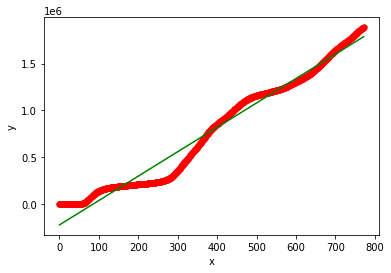

In [ ]:
# observations / data
x = index_arrayEU
y = death_arrayEU

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
print("\n")
# plotting regression line
plot_regression_line(x, y, b)

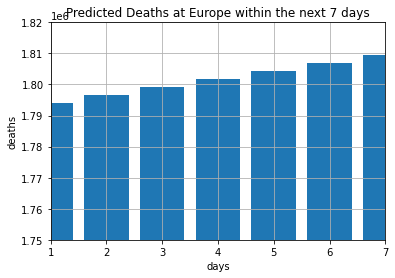

In [ ]:
pred_array = np.array([])
mat_array = np.array([])
day = 1
for days in range(7):
  pred_array = np.append(pred_array, [b[0]+b[1]*(773+day)])
  mat_array = np.append(mat_array,[day])
  day += 1

fig ,ax = plt.subplots()

plt.bar(mat_array,pred_array)
ax.set(xlabel ='days', ylabel ='deaths', xlim =(1, 7), ylim =(1750000, 1820000), title ='Predicted Deaths at Europe within the next 7 days')
ax.grid()
plt.show()

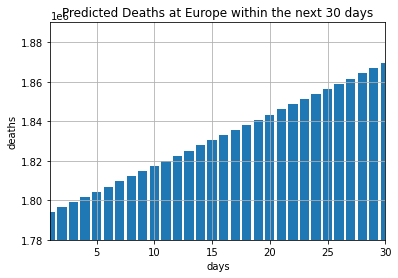

In [ ]:
pred_array = np.array([])
mat_array = np.array([])
day = 1
for days in range(30):
  pred_array = np.append(pred_array, [b[0]+b[1]*(773+day)])
  mat_array = np.append(mat_array,[day])
  day += 1

fig ,ax = plt.subplots()

plt.bar(mat_array,pred_array)
ax.set(xlabel ='days', ylabel ='deaths', xlim =(1, 30), ylim =(1780000, 1890000), title ='Predicted Deaths at Europe within the next 30 days')
ax.grid()
plt.show()

In [ ]:
recovered_europe = dfEu["Recovered"]
recovered_arrayEU = np.array([])
index_arrayEU2 = np.array([])
index_number = 0
for number in range(773):
  recovered_arrayEU = np.append(recovered_arrayEU,[recovered_europe.iloc[number]])
  index_arrayEU2 = np.append(index_arrayEU2,[index_number])
  index_number +=1
print(recovered_arrayEU)
#print(index_arrayEU)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 6.0000000e+00 7.0000000e+00 7.0000000e+00 1.1000000e+01
 1.8000000e+01 1.9000000e+01 3.0000000e+01 3.0000000e+01 3.0000000e+01
 3.2000000e+01 3.3000000e+01 3.4000000e+01 3.3000000e+01 4.0000000e+01
 4.3000000e+01 8.6000000e+01 8.7000000e+01 8.8000000e+01 1.2500000e+02
 1.9100000e+02 2.0400000e+02 3.2200000e+02 4.6000000e+02 5.7100000e+02
 6.7800000e+02 7.1200000e+02 8.2000000e+02 8.2700000e+02 1.3130000e+03
 1.3150000e+03 1.7470000e+03 2.6210000e+03 3.0100000e+03 3.4730000e+03
 4.2110000e+03 5.4620000e+03 5.9110000e+03 6.4450000e+03 9.0080000e+03
 1.2817000e+04 1.2821000e+04 1.9811000e+04 2.3582000e+04 2.9740000e+04
 3.6328000e+04 4.2869000e+04 4.8987000e+04 5.8509000e+04 6.7244000e+04
 7.934

Estimated coefficients:
b_0 = 5144393.265962673 
b_1 = 9776.664440444178




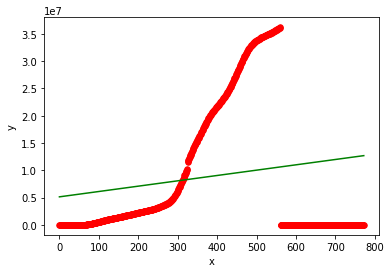

In [ ]:
# observations / data
x = index_arrayEU2
y = recovered_arrayEU

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1]))
print("\n")
# plotting regression line
plot_regression_line(x, y, b)

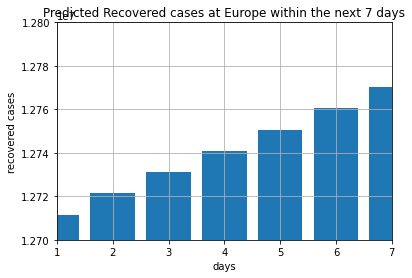

In [ ]:
pred_array = np.array([])
mat_array = np.array([])
day = 1
for days in range(7):
  pred_array = np.append(pred_array, [b[0]+b[1]*(773+day)])
  mat_array = np.append(mat_array,[day])
  day += 1

fig ,ax = plt.subplots()

plt.bar(mat_array,pred_array)
ax.set(xlabel ='days', ylabel ='recovered cases',xlim =(1, 7), ylim =(12700000, 12800000), title ='Predicted Recovered cases at Europe within the next 7 days')
ax.grid()
plt.show()

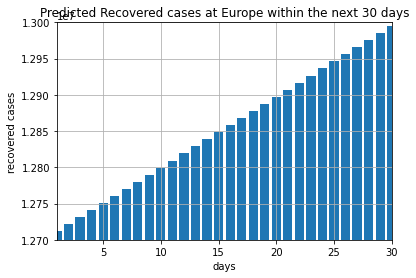

In [ ]:
pred_array = np.array([])
mat_array = np.array([])
day = 1
for days in range(30):
  pred_array = np.append(pred_array, [b[0]+b[1]*(773+day)])
  mat_array = np.append(mat_array,[day])
  day += 1

fig ,ax = plt.subplots()

plt.bar(mat_array,pred_array)
ax.set(xlabel ='days', ylabel ='recovered cases', xlim =(1, 30), ylim =(12700000, 13000000), title ='Predicted Recovered cases at Europe within the next 30 days')
ax.grid()
plt.show()

### Random Forest

In [ ]:
dfafrica = df.loc[df['WHO Region'] == 'Africa']
dfAf = dfafrica.groupby(by=['Date']).sum()

dfAf = dfAf.drop(["Lat"], axis=1)
dfAf = dfAf.drop(["Long"], axis=1)
dfAf

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2022-02-28,7995660,169153,0,7826507
2022-03-01,7998648,169178,0,7829470
2022-03-02,8001845,169224,0,7832621


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

encoder = OrdinalEncoder()
dfAf["Confirmed"] = encoder.fit_transform(dfAf[["Confirmed"]])

y= dfAf["Deaths"]
X= dfAf.drop(["Deaths"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
dfAf

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,0.0,0,0,0
2020-01-23,0.0,0,0,0
2020-01-24,0.0,0,0,0
2020-01-25,0.0,0,0,0
2020-01-26,0.0,0,0,0
...,...,...,...,...
2022-02-28,730.0,169153,0,7826507
2022-03-01,731.0,169178,0,7829470
2022-03-02,732.0,169224,0,7832621


In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Decision Tree Training
model_dt = tree.DecisionTreeClassifier(random_state=42) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

#Random Forest Training(In new version default of estimators will be 100)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:"+str(rf_acc))
print("---------")
feature_list = list(X_train.columns)

# Get importance list from model
importances = list(model_rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
for pair in feature_importances:
  print("Variable: {:2} - - - - -  Importance: {}".format(*pair))

Random Forest Accuracy:0.061855670103092786
---------
Variable: Confirmed - - - - -  Importance: 0.4
Variable: Active - - - - -  Importance: 0.38
Variable: Recovered - - - - -  Importance: 0.22


As we can see from above, death counts are mostly related to confirmed cases and the confirmed case variable affects the death count.

## Discussion and End of the Project

With this project we became able to learn how to work with real datasets and also we actually see the importance of visualizing data. The main reason why we think like this is that before visualizing the data we did not understand what data shows us.

In addition, we implemented hypothesis testing which was theoretically taught us in CS210 lectures. By this way, we perfectly understood how to infer p-values and make inferences about hypothesis.

Lastly, we worked on machine learning models. In that process, we learned how a machine, computer can predict future values by using historical values.

After all, in terms of COVID-19, we saw the effects of the pandemic on different WHO regions, countries and most specifically provinces of countries. The devastating effects on different areas were clearly seen in this process.
Moreover, we are now able to make detailed conclusions and comments on the features of the pandemic.

We, as a group, give special thanks to our supervisor, Muhammet Nurullah Cebeci, for his useful supports with feedbacks and comments; and to our professor, Selim Balcısoy for his explanations, clarifications and helpful approach.

# THE END

<font color="yellow" size=4>
by Group 5
</font>

Buket YURT - 28263 (buketyurt@sabanciuniv.edu)

Kaan Coşkun ADALILAR - 28384 (kaanadalilar@sabanciuniv.edu)

Remzi Umut SÖNMEZ - 28178 (remzis@sabanciuniv.edu)

Burak YEREBAKAN - 27875 (burakyerebakan@sabanciuniv.edu)